In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
GLOBAL_LIDAR = '../data/processed/nestedcv_chained_global_results_lidar_structure.csv'
GLOBAL_SATELLITE = '../data/processed/nestedcv_chained_global_results_satellite_structure.csv'

INSIDER_LIDAR = '../data/processed/nestedcv_chained_insider_results_lidar_structure.csv'
INSIDER_SATELLITE = '../data/processed/nestedcv_chained_insider_results_satellite_structure.csv'

OUTSIDER_LIDAR = '../data/processed/nestedcv_chained_outsider_results_lidar_structure.csv'
OUTSIDER_SATELLITE = '../data/processed/nestedcv_chained_outsider_results_satellite_structure.csv'

VISITOR_LIDAR = '../data/processed/nestedcv_chained_visitor_results_lidar_structure.csv'
VISITOR_SATELLITE = '../data/processed/nestedcv_chained_visitor_results_satellite_structure.csv'

In [3]:
global_lidar = pd.read_csv(GLOBAL_LIDAR)
global_satellite = pd.read_csv(GLOBAL_SATELLITE)
global_lidar['DATA_SOURCE'] = 'lidar'
global_satellite['DATA_SOURCE'] = 'satellite'
global_df = (pd.concat([global_lidar, global_satellite], 
                       axis=0, ignore_index=True)
             .rename({'ECOREGION':'TARGET_ECOREGION'}, axis=1))
global_df['SCOPE'] = 'global'
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CV_FOLD           10800 non-null  int64  
 1   TARGET_ECOREGION  10800 non-null  object 
 2   TARGET            10800 non-null  object 
 3   METRIC            10800 non-null  object 
 4   SCORE             10800 non-null  float64
 5   MODEL             10800 non-null  object 
 6   DATA_SOURCE       10800 non-null  object 
 7   SCOPE             10800 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 675.1+ KB


In [4]:
insider_lidar = pd.read_csv(INSIDER_LIDAR)
insider_satellite = pd.read_csv(INSIDER_SATELLITE)
insider_lidar['DATA_SOURCE'] = 'lidar'
insider_satellite['DATA_SOURCE'] = 'satellite'
insider_df = (pd.concat([insider_lidar, insider_satellite], 
                       axis=0, ignore_index=True)
              .rename({'ECOREGION':'TARGET_ECOREGION'}, axis=1))
insider_df['SCOPE'] = 'insider'
insider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CV_FOLD           10800 non-null  int64  
 1   TARGET_ECOREGION  10800 non-null  object 
 2   TARGET            10800 non-null  object 
 3   METRIC            10800 non-null  object 
 4   SCORE             10800 non-null  float64
 5   MODEL             10800 non-null  object 
 6   DATA_SOURCE       10800 non-null  object 
 7   SCOPE             10800 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 675.1+ KB


In [5]:
visitor_lidar = pd.read_csv(VISITOR_LIDAR)
visitor_satellite = pd.read_csv(VISITOR_SATELLITE)
visitor_lidar['DATA_SOURCE'] = 'lidar'
visitor_satellite['DATA_SOURCE'] = 'satellite'
visitor_df = pd.concat([visitor_lidar, visitor_satellite], axis=0, ignore_index=True)
visitor_df['SCOPE'] = 'visitor'
visitor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TARGET_ECOREGION  17280 non-null  object 
 1   TRAIN_ECOREGION   17280 non-null  object 
 2   MODEL             17280 non-null  object 
 3   METRIC            17280 non-null  object 
 4   TARGET            17280 non-null  object 
 5   SCORE             17280 non-null  float64
 6   DATA_SOURCE       17280 non-null  object 
 7   SCOPE             17280 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.1+ MB


In [6]:
outsider_lidar = pd.read_csv(OUTSIDER_LIDAR)
outsider_satellite = pd.read_csv(OUTSIDER_SATELLITE)
outsider_lidar['DATA_SOURCE'] = 'lidar'
outsider_satellite['DATA_SOURCE'] = 'satellite'
outsider_df = (pd.concat([outsider_lidar, outsider_satellite], 
                         axis=0, ignore_index=True)
               .rename({'ECOREGION':'TARGET_ECOREGION'}, axis=1))
outsider_df['SCOPE'] = 'outsider'
outsider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CV_FOLD           0 non-null      float64
 1   TARGET_ECOREGION  2160 non-null   object 
 2   TARGET            2160 non-null   object 
 3   METRIC            2160 non-null   object 
 4   SCORE             2160 non-null   float64
 5   MODEL             2160 non-null   object 
 6   DATA_SOURCE       2160 non-null   object 
 7   SCOPE             2160 non-null   object 
dtypes: float64(2), object(6)
memory usage: 135.1+ KB


In [7]:
df = pd.concat([
    global_df, insider_df, outsider_df, visitor_df
], axis=0, ignore_index=True, sort=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41040 entries, 0 to 41039
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CV_FOLD           21600 non-null  float64
 1   DATA_SOURCE       41040 non-null  object 
 2   METRIC            41040 non-null  object 
 3   MODEL             41040 non-null  object 
 4   SCOPE             41040 non-null  object 
 5   SCORE             41040 non-null  float64
 6   TARGET            41040 non-null  object 
 7   TARGET_ECOREGION  41040 non-null  object 
 8   TRAIN_ECOREGION   17280 non-null  object 
dtypes: float64(2), object(7)
memory usage: 2.8+ MB


In [8]:
df['ECOREGION_LABEL'] = df['TARGET_ECOREGION'].apply(lambda x: ' '.join(x.title().split(' ')[0:2]))
df['MODEL'] = df['MODEL'].replace(
    {'KNeighborsRegressor': 'kNN', 
     'RandomForestRegressor': 'RF',
     'HistGradientBoostingRegressor': 'GBM',
    })

In [9]:
df.loc[df.SCOPE == 'insider', 'TRAIN_ECOREGION'] = df.loc[df.SCOPE == 'insider', 'TARGET_ECOREGION']
df.loc[df.SCOPE == 'global', 'TRAIN_ECOREGION'] = 'global'
df.loc[df.SCOPE == 'outsider', 'TRAIN_ECOREGION'] = 'outsider'

In [10]:
df.to_csv('../data/processed/structure_prediction_transferability_consolidated_results.csv', index=False, header=True)

In [11]:
print(np.unique(df.TARGET))
print(np.unique(df.METRIC))
print(np.unique(df.ECOREGION_LABEL))
print(np.unique(df.MODEL))

['qmd' 'tcuft' 'topht' 'total_cover']
['bias' 'mae' 'mape' 'nrmse' 'rel_bias' 'rmse']
['Blue Mountains' 'Cascades' 'Coast Range' 'Eastern Cascades'
 'Klamath Mountains' 'North Cascades' 'Northern Rockies' 'Puget Lowland'
 'Willamette Valley']
['ElasticNet' 'GBM' 'Lasso' 'RF' 'kNN']


In [12]:
def make_plot(plot_df, target, metric, data_source, ylim=(None, None), exclude_visitor=False):
    if exclude_visitor:
        order = ['OUTSIDER', 'INSIDER', 'GLOBAL']
    else:
        order = ['VISITOR', 'OUTSIDER', 'INSIDER', 'GLOBAL']
    g = sns.catplot(data=plot_df, x='SCOPE', y='SCORE',
                    order=order,
                    col='ECOREGION_LABEL', col_wrap=3,
                    hue='MODEL', kind='box',
                   )
    g.set(ylim=ylim)
    axs = g.axes.flatten()
    for ax in axs:
        ax.set_title(
            (ax.get_title()
             .replace('ECOREGION_LABEL = ', '')
             .upper()), fontsize=14)
        ax.set_ylabel(ax.get_ylabel().replace('SCORE', metric.upper()), fontsize=14)
        ax.set_xlabel(ax.get_xlabel().replace('SCOPE', ''), fontsize=14)
    g.fig.suptitle(target.replace('_', ' ').upper() + f' PREDICTED FROM {data_source}'.upper(), 
                   size=16, fontweight='bold')
    g.fig.subplots_adjust(top=.94)
    return g

def make_plots(target, metric, ylim=(None, None), exclude_visitor=False):
    query = ''.join([
        f'TARGET == "{target}" and ',
        f'METRIC == "{metric}"'
    ])
    to_plot = df.query(query).copy()
    if exclude_visitor:
        to_plot = to_plot.loc[to_plot.SCOPE != 'visitor']
    to_plot['SCOPE'] = to_plot['SCOPE'].str.upper()
    plot1 = to_plot.loc[to_plot.DATA_SOURCE == 'lidar']
    plot2 = to_plot.loc[to_plot.DATA_SOURCE == 'satellite']
    g1 = make_plot(plot1, target, metric, 'lidar', ylim=ylim, exclude_visitor=exclude_visitor)
    g2 = make_plot(plot2, target, metric, 'satellite', ylim=ylim, exclude_visitor=exclude_visitor)
    return g1, g2

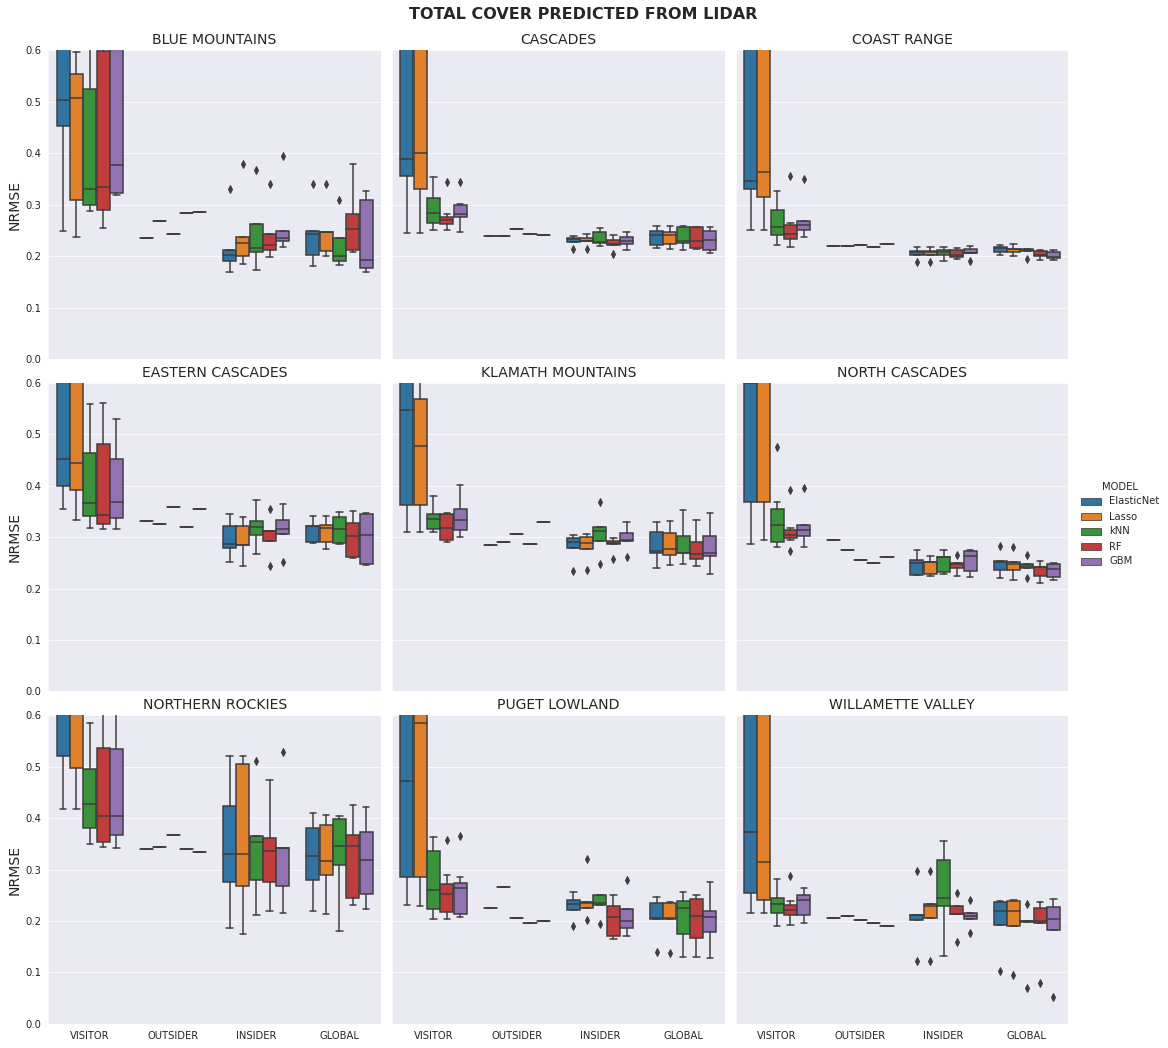

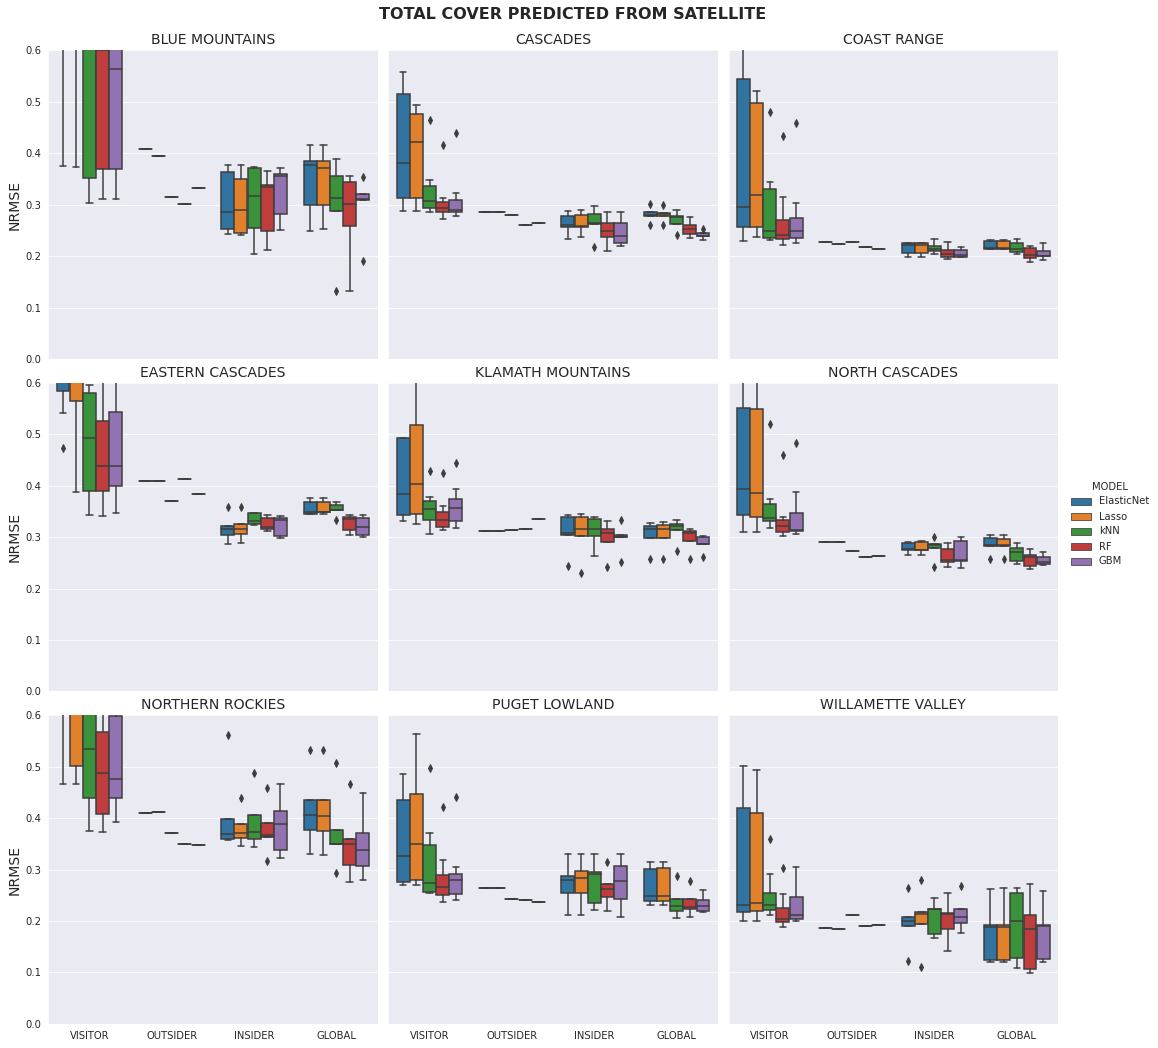

In [13]:
TARGET = 'total_cover'
METRIC = 'nrmse'
g1, g2 = make_plots(TARGET, METRIC, ylim=(0,0.6))
g1.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_lidar.png", bbox_inches='tight', dpi=300)
g2.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_satellite.png", bbox_inches='tight', dpi=300)

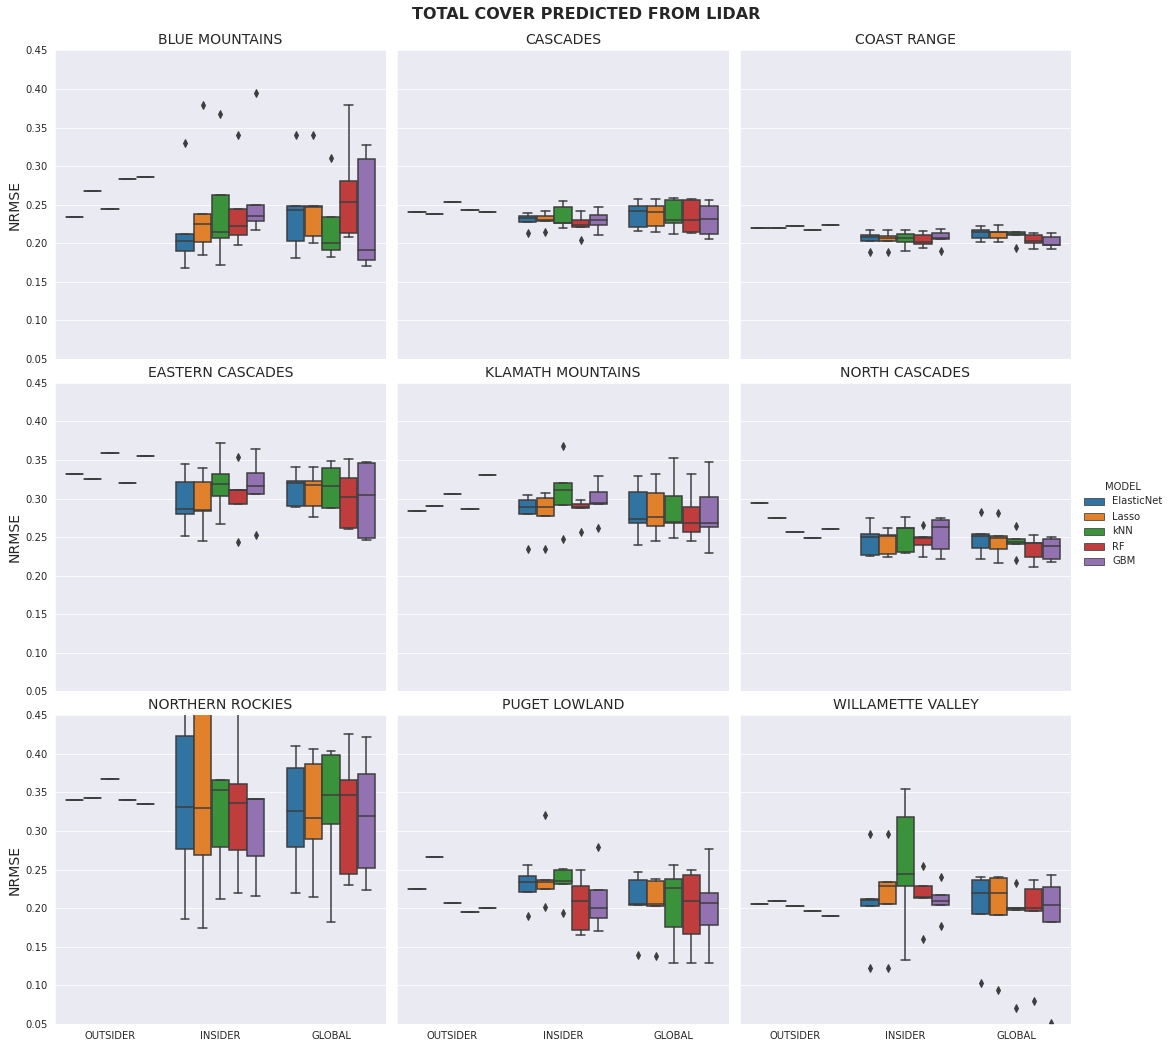

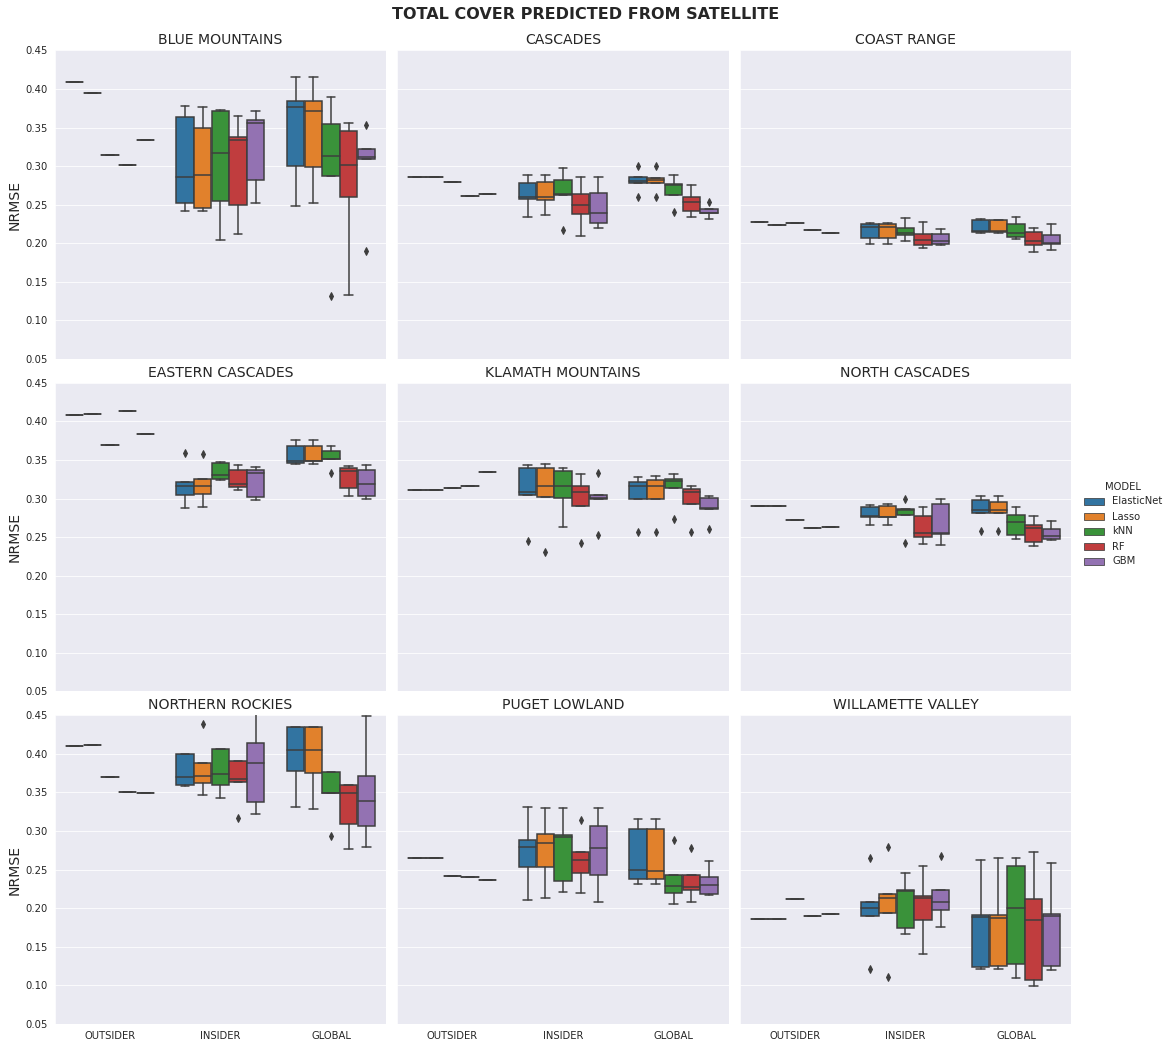

In [14]:
TARGET = 'total_cover'
METRIC = 'nrmse'
g1, g2 = make_plots(TARGET, METRIC, ylim=(0.05,0.45), exclude_visitor=True)
g1.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_lidar_exclude-visitor.png", bbox_inches='tight', dpi=300)
g2.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_satellite_exclude-visitor.png", bbox_inches='tight', dpi=300)

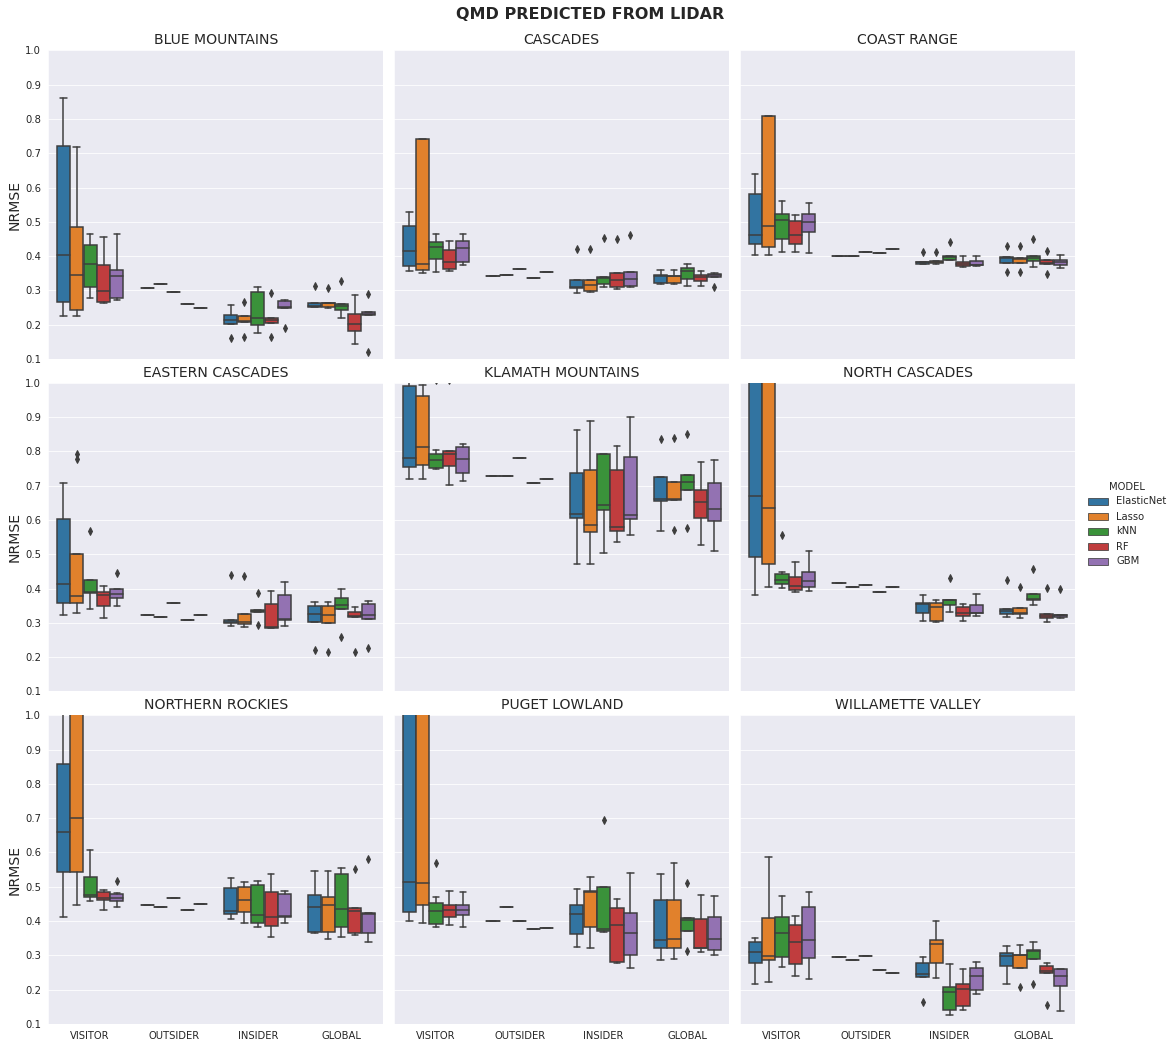

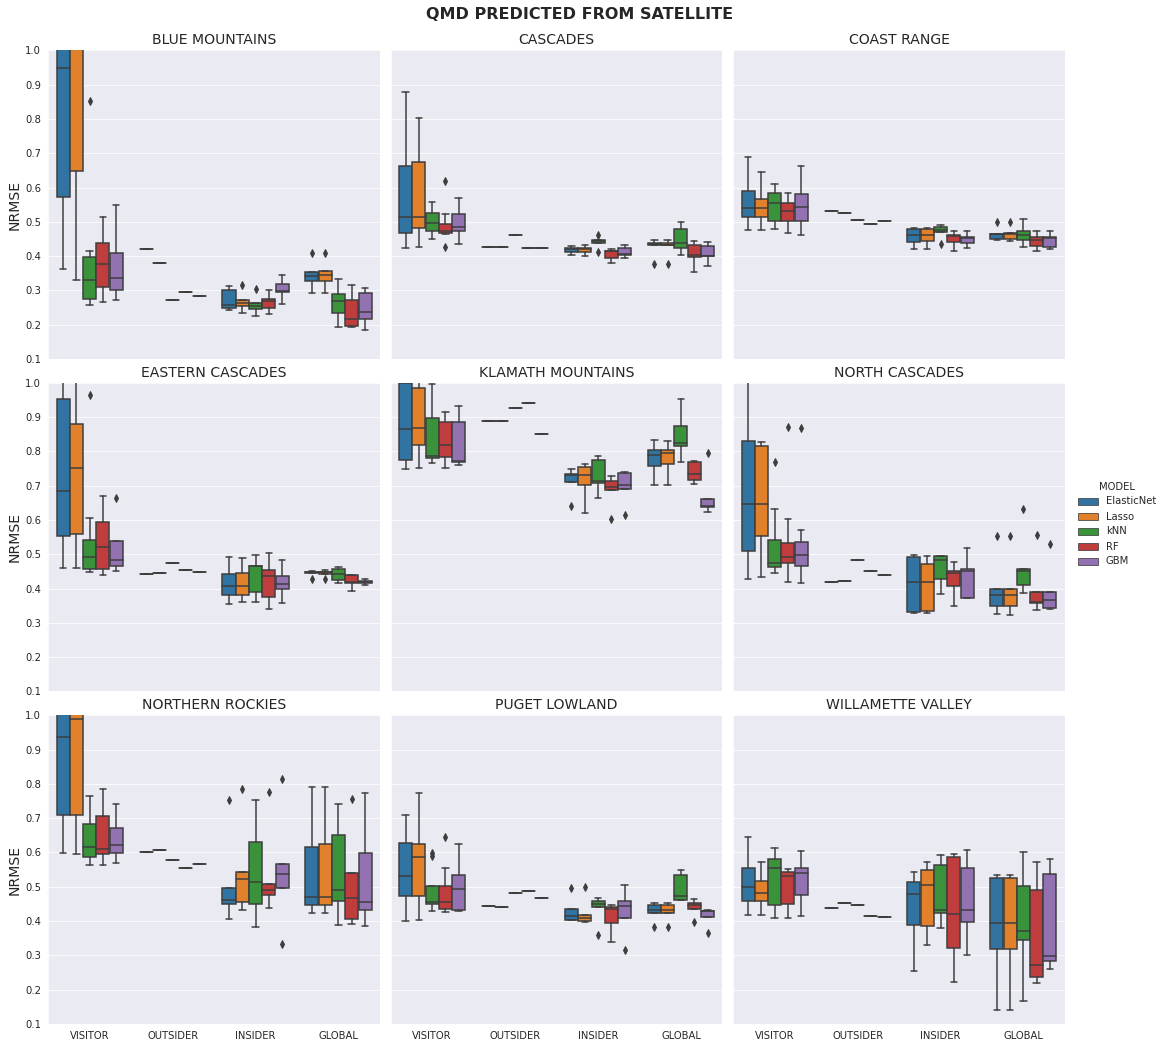

In [15]:
TARGET = 'qmd'
METRIC = 'nrmse'
g1, g2 = make_plots(TARGET, METRIC, ylim=(0.1,1.0))
g1.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_lidar.png", bbox_inches='tight', dpi=300)
g2.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_satellite.png", bbox_inches='tight', dpi=300)

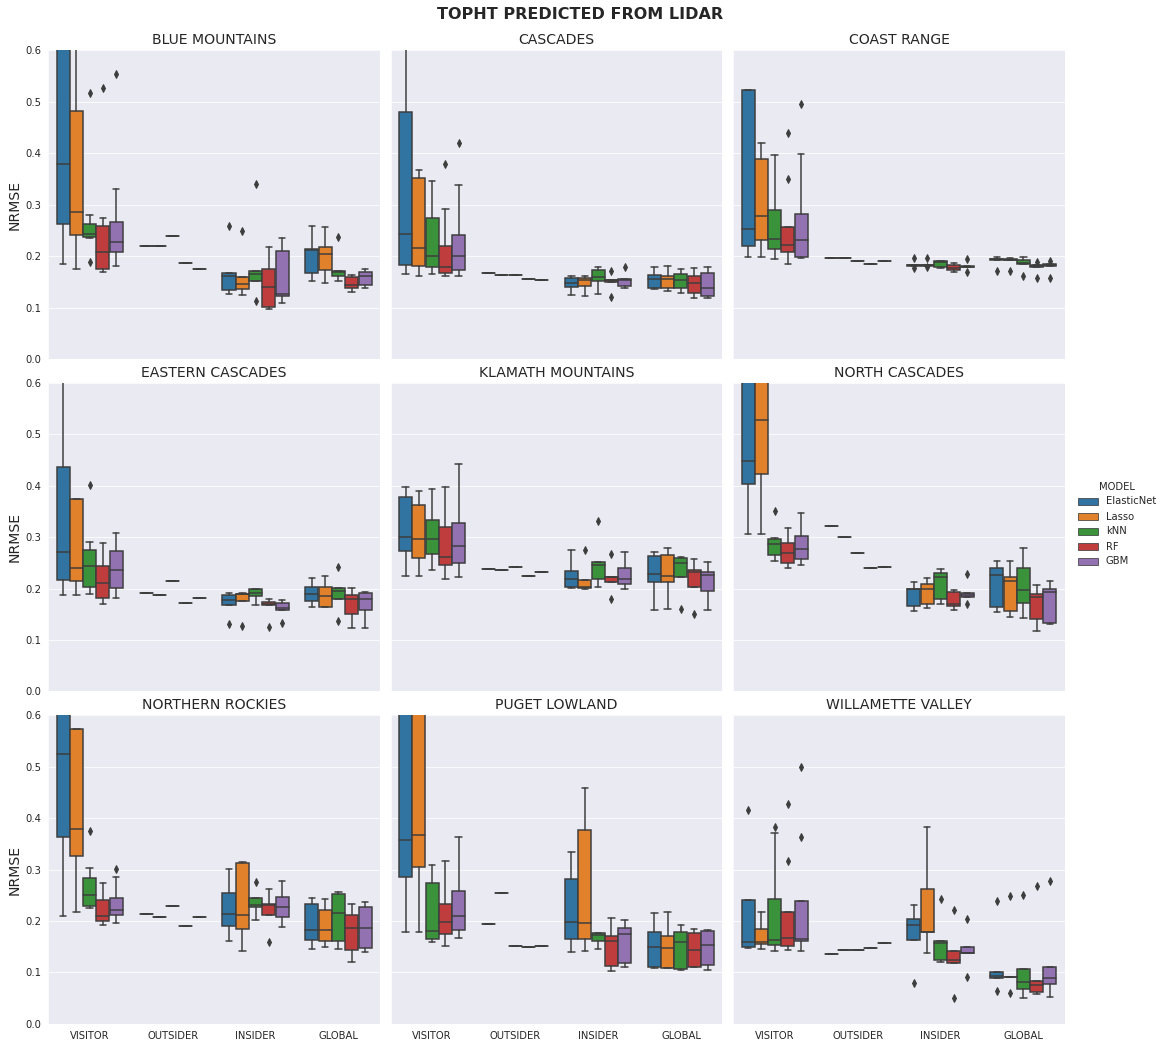

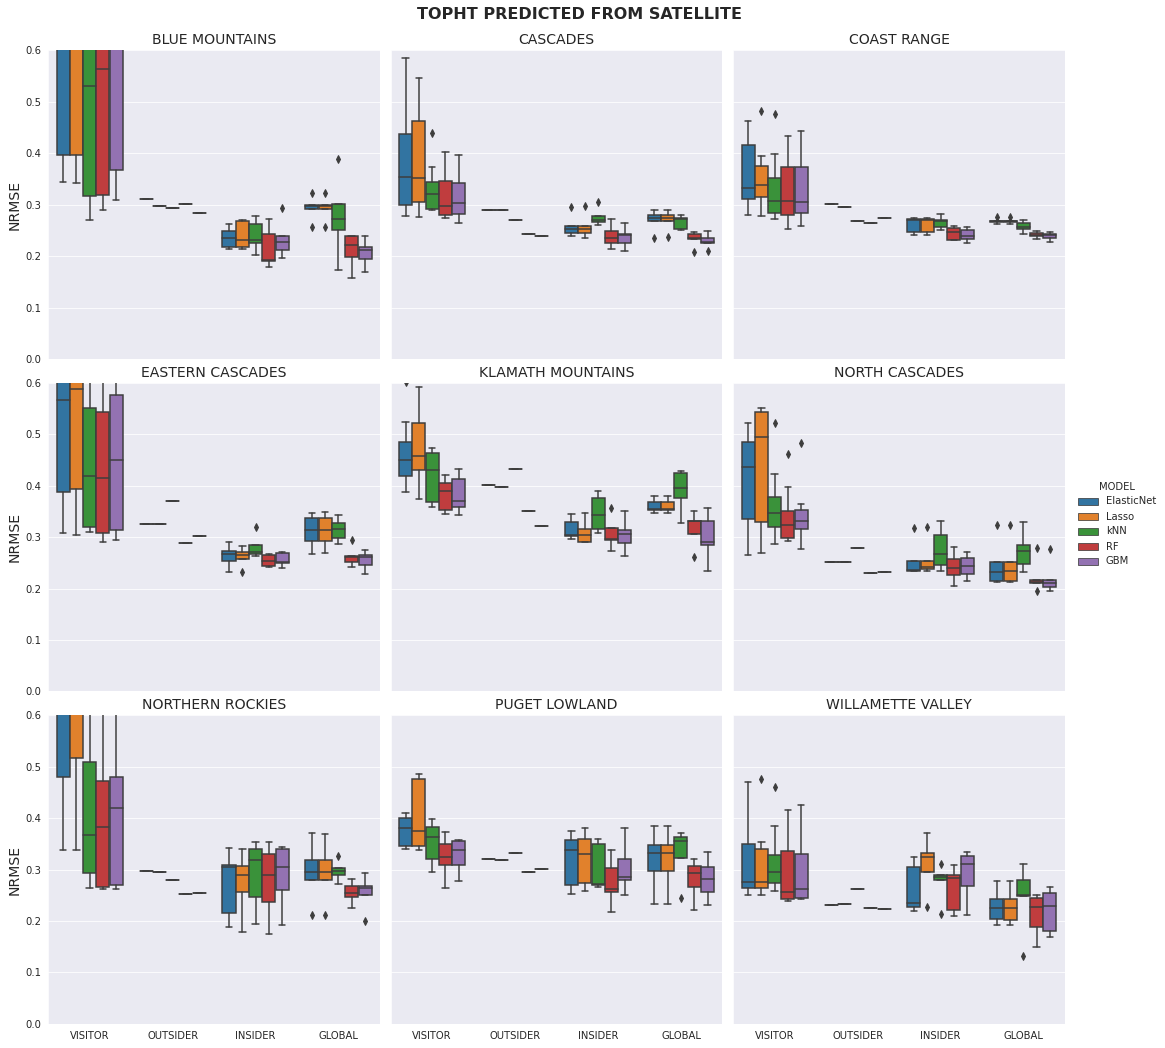

In [16]:
TARGET = 'topht'
METRIC = 'nrmse'
g1, g2 = make_plots(TARGET, METRIC, ylim=(0.0,0.6))
g1.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_lidar.png", bbox_inches='tight', dpi=300)
g2.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_satellite.png", bbox_inches='tight', dpi=300)

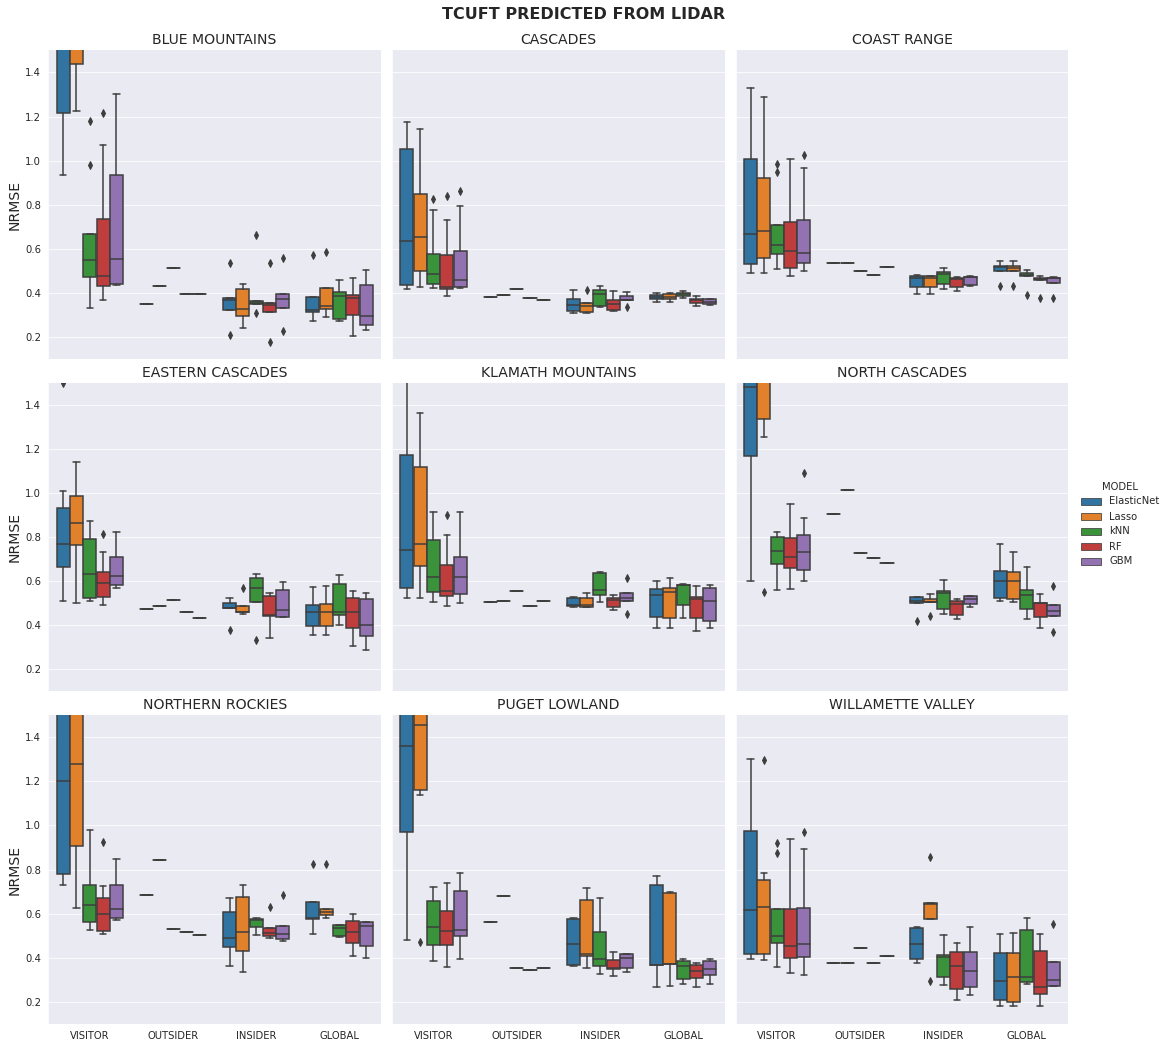

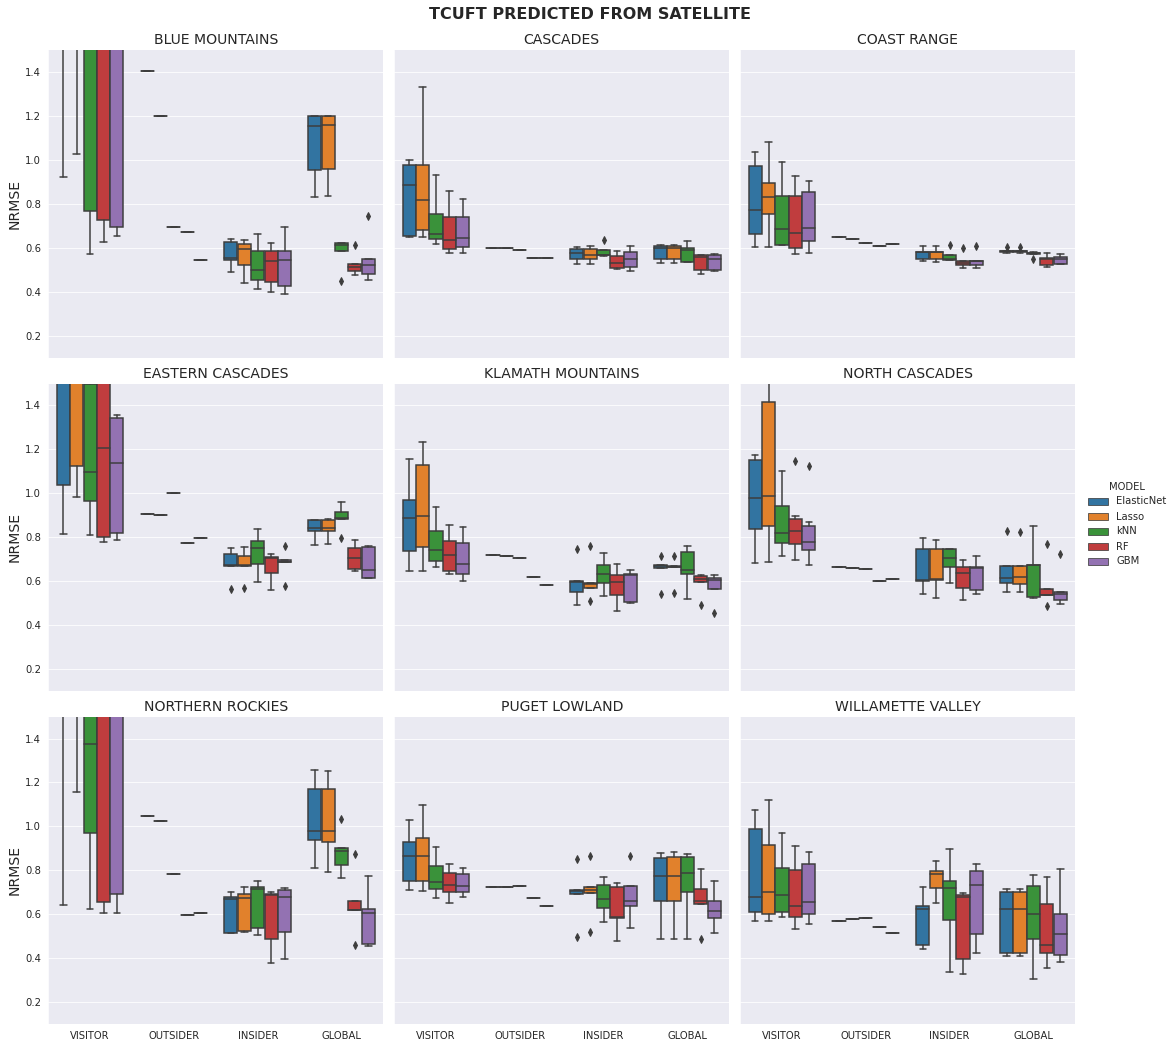

In [17]:
TARGET = 'tcuft'
METRIC = 'nrmse'
g1, g2 = make_plots(TARGET, METRIC, ylim=(0.1,1.5))
g1.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_lidar.png", bbox_inches='tight', dpi=300)
g2.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_satellite.png", bbox_inches='tight', dpi=300)

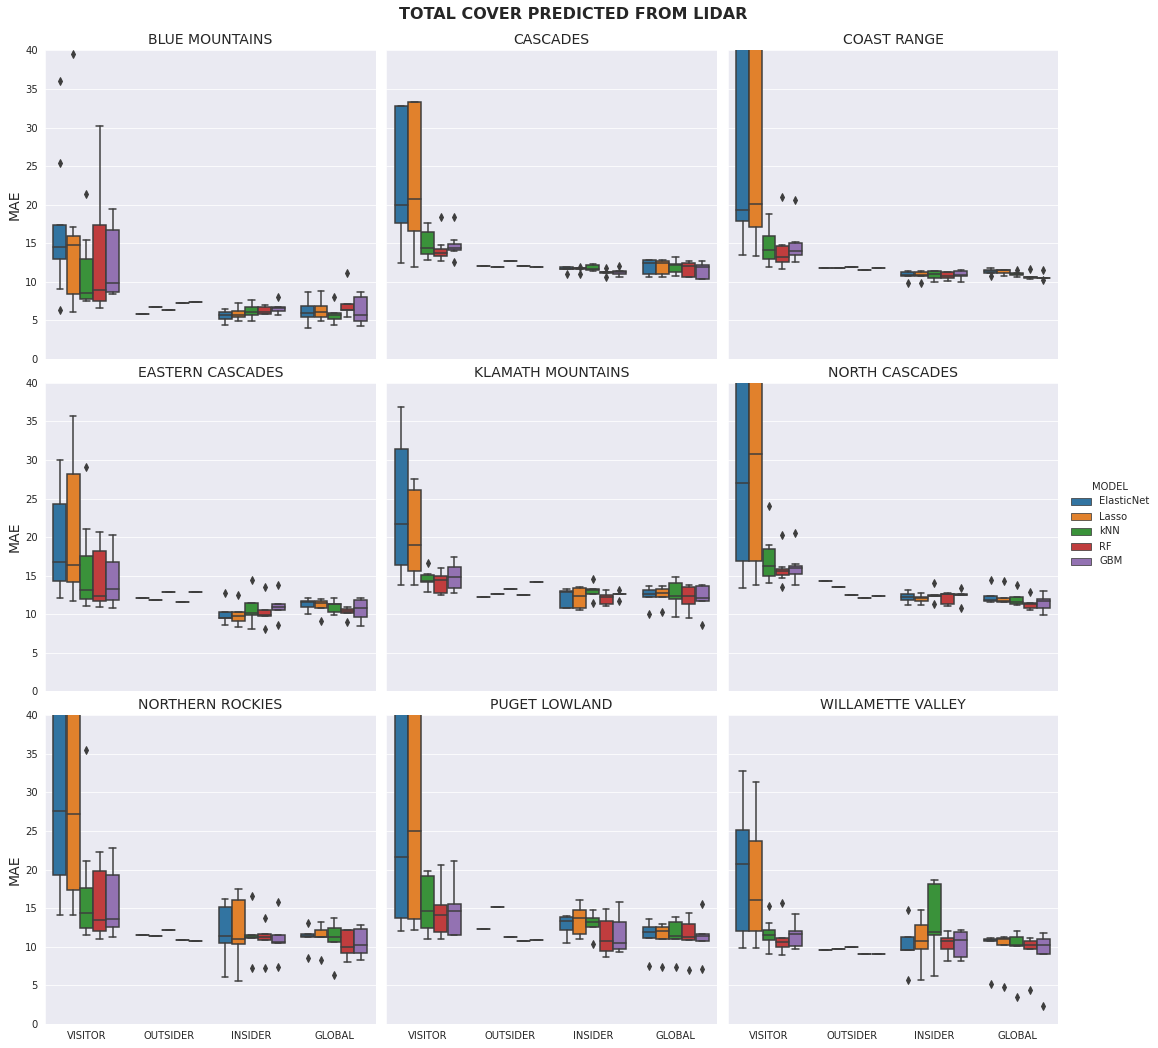

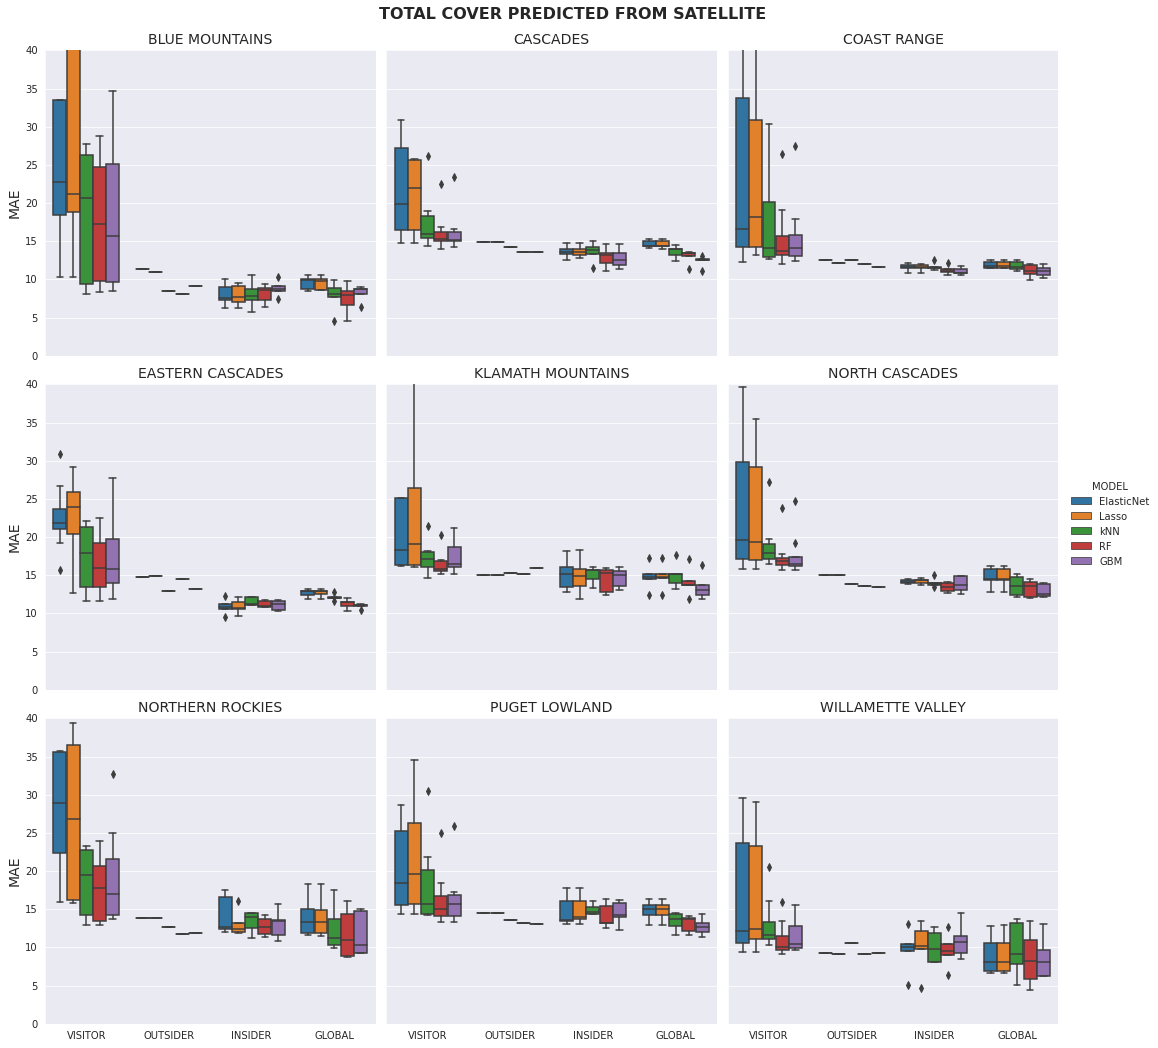

In [18]:
TARGET = 'total_cover'
METRIC = 'mae'
g1, g2 = make_plots(TARGET, METRIC, ylim=(0,40))
g1.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_lidar.png", bbox_inches='tight', dpi=300)
g2.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_satellite.png", bbox_inches='tight', dpi=300)

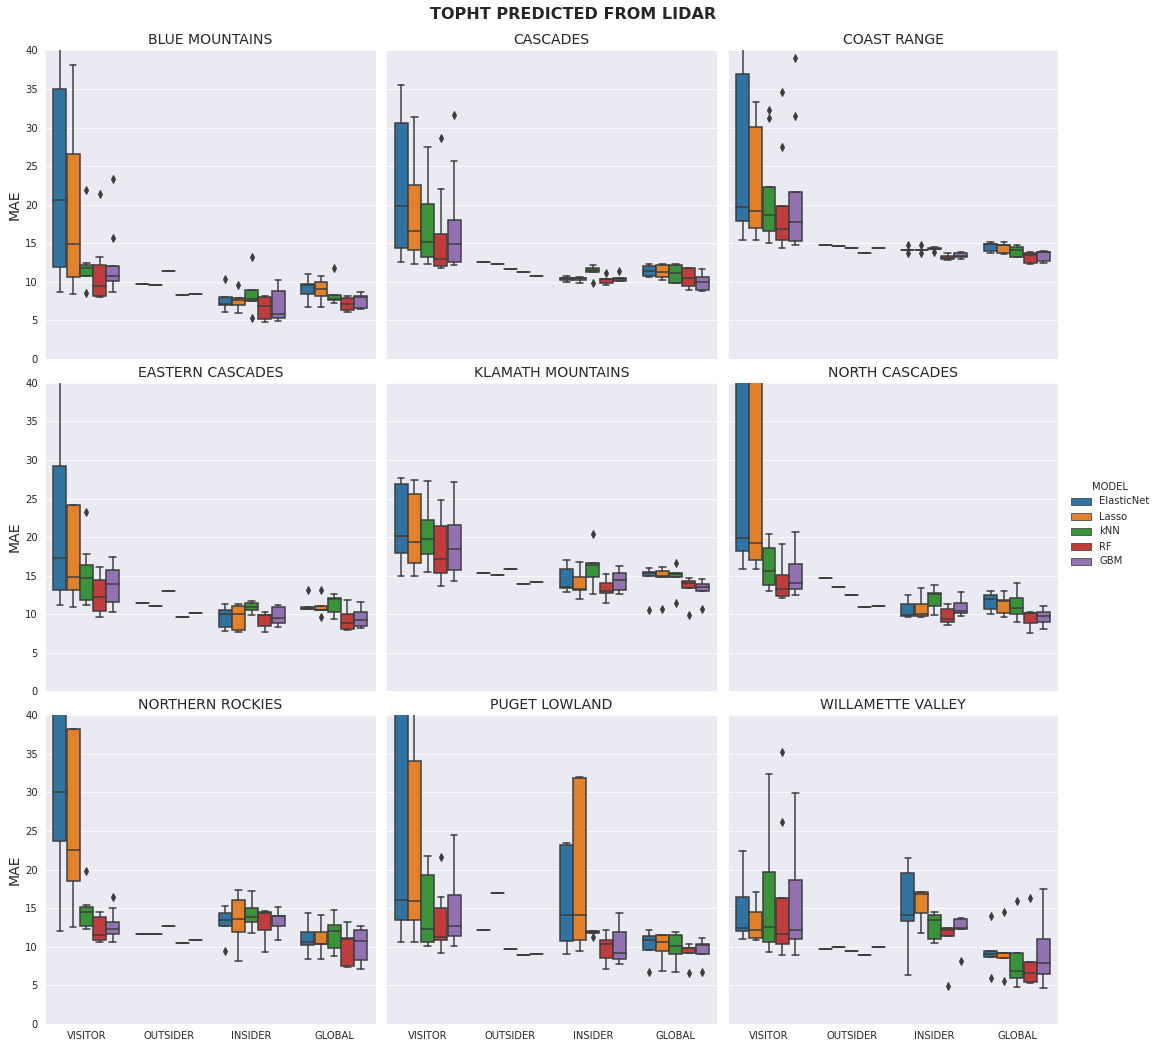

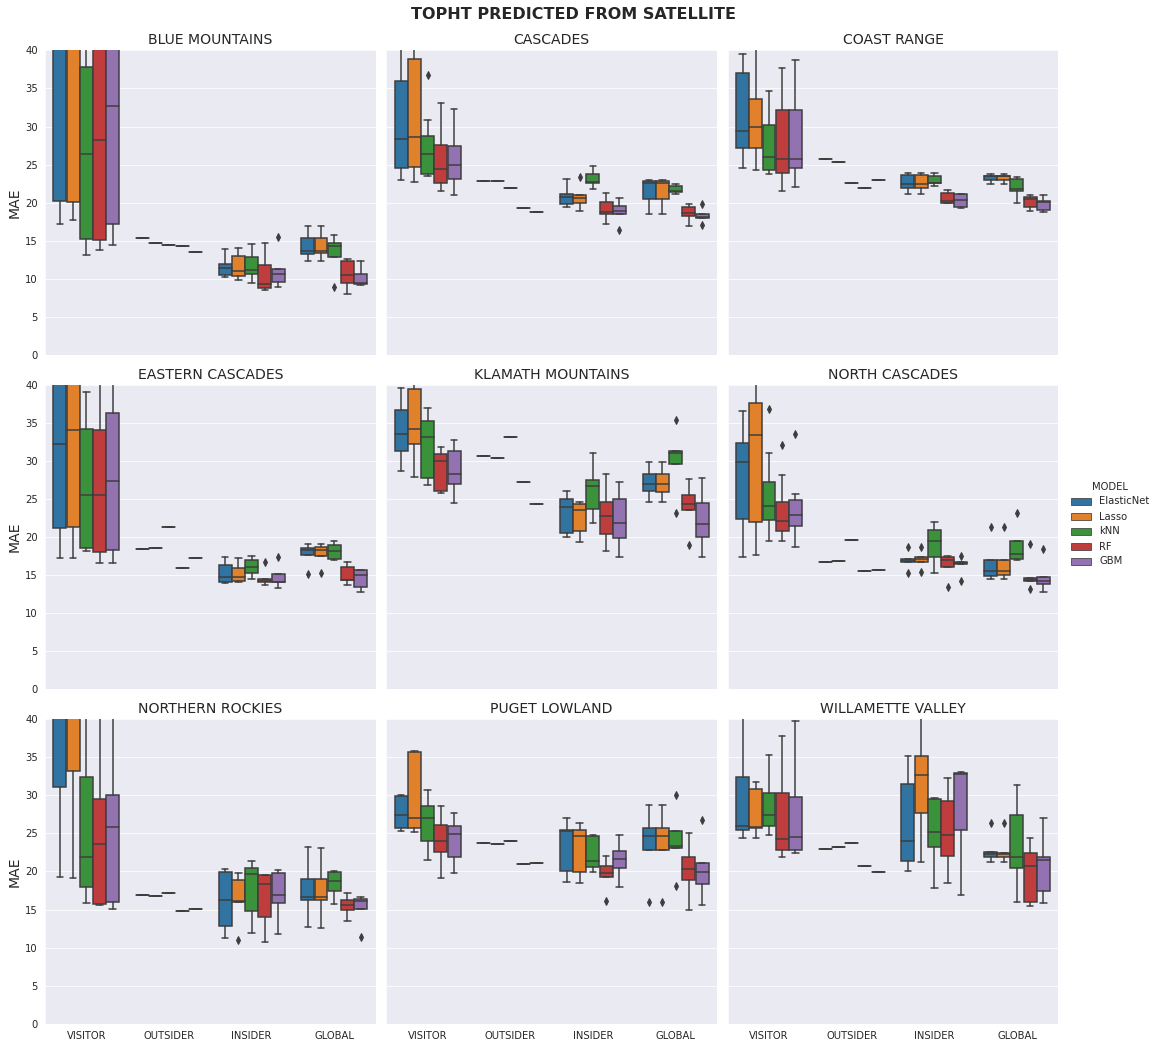

In [19]:
TARGET = 'topht'
METRIC = 'mae'
g1, g2 = make_plots(TARGET, METRIC, ylim=(0,40))
g1.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_lidar.png", bbox_inches='tight', dpi=300)
g2.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_satellite.png", bbox_inches='tight', dpi=300)

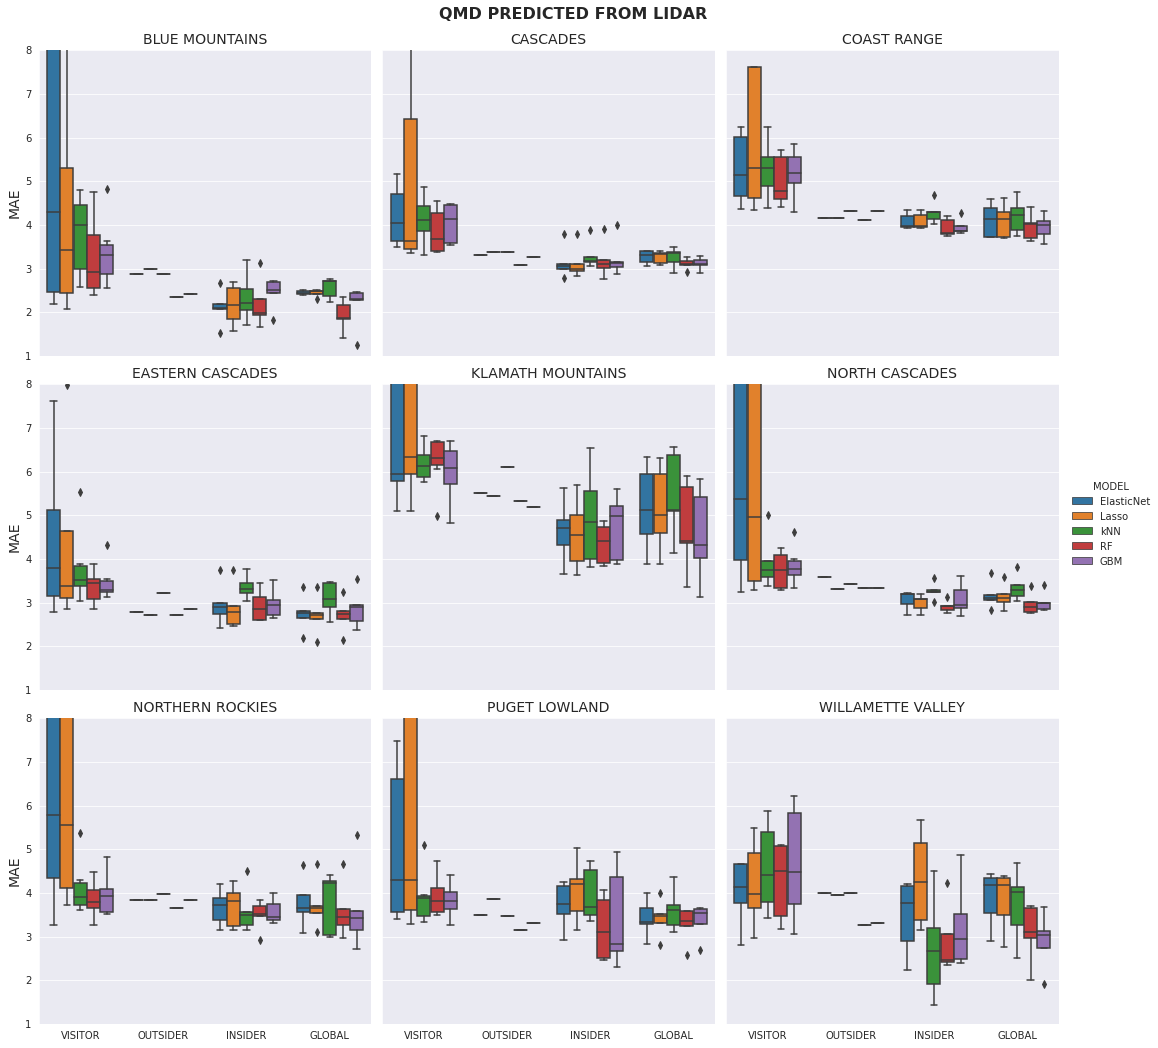

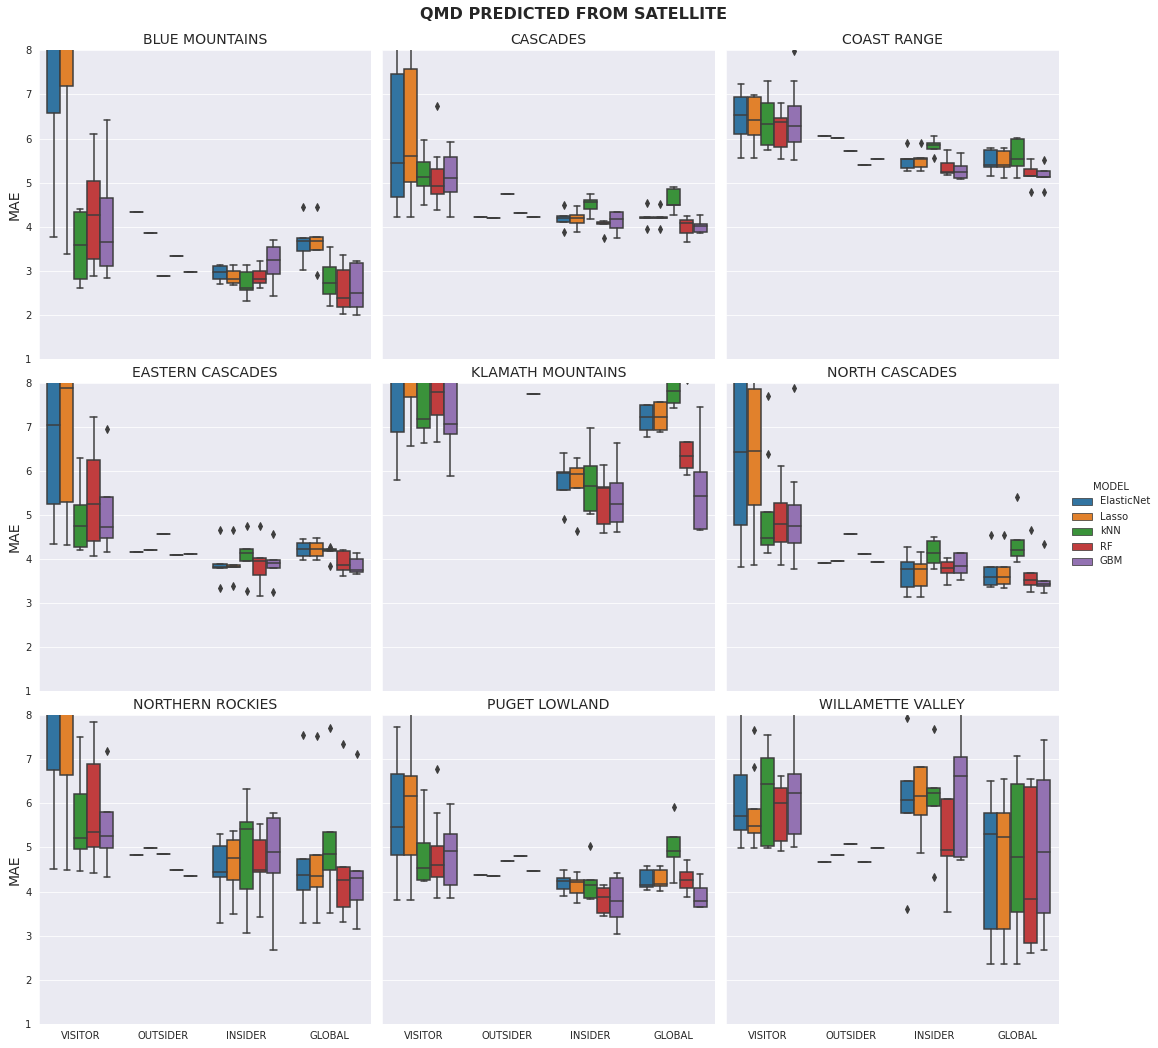

In [20]:
TARGET = 'qmd'
METRIC = 'mae'
g1, g2 = make_plots(TARGET, METRIC, ylim=(1.0,8.0))
g1.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_lidar.png", bbox_inches='tight', dpi=300)
g2.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_satellite.png", bbox_inches='tight', dpi=300)

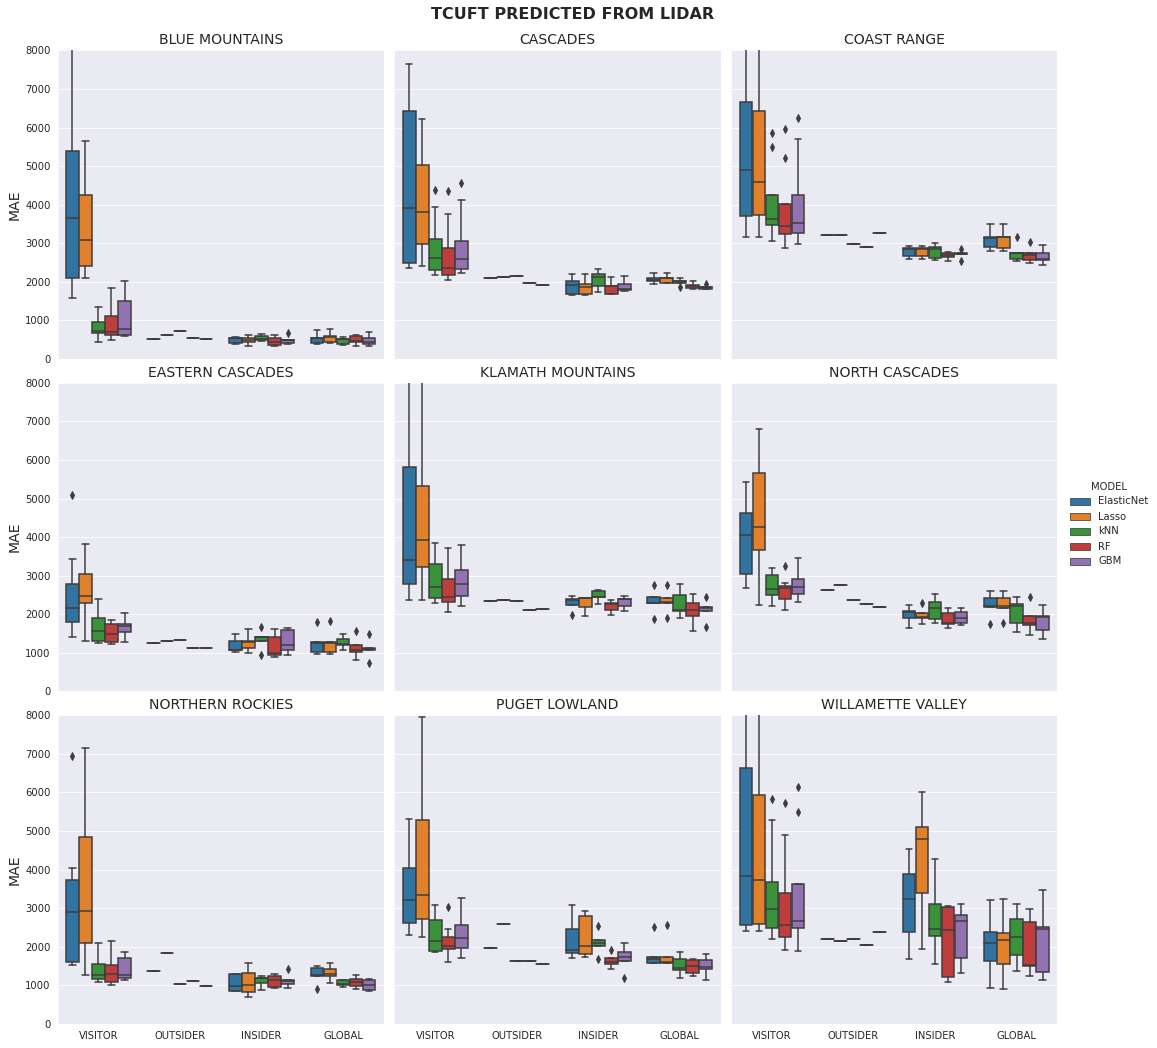

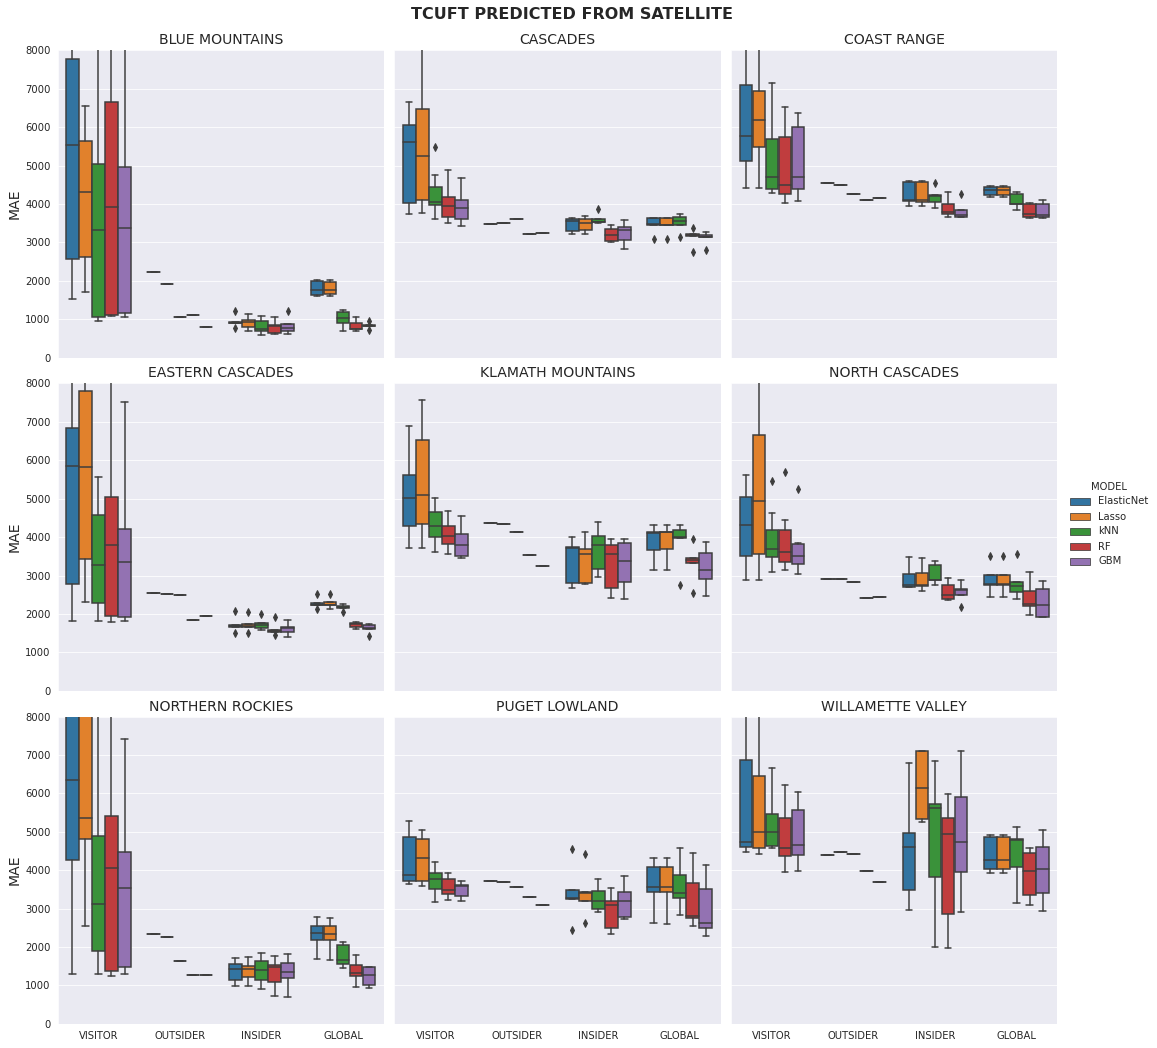

In [21]:
TARGET = 'tcuft'
METRIC = 'mae'
g1, g2 = make_plots(TARGET, METRIC, ylim=(0,8000))
g1.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_lidar.png", bbox_inches='tight', dpi=300)
g2.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_satellite.png", bbox_inches='tight', dpi=300)

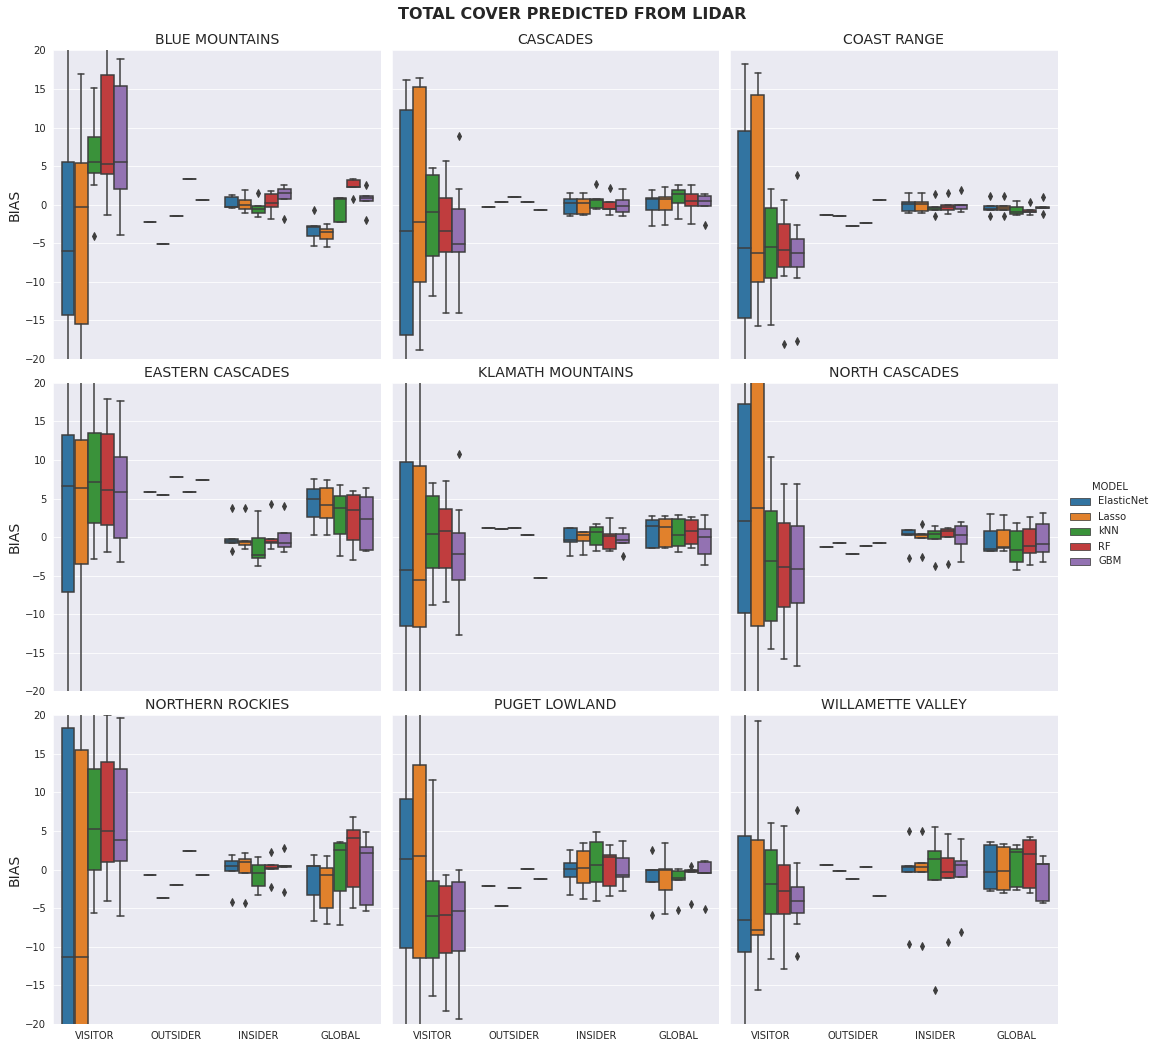

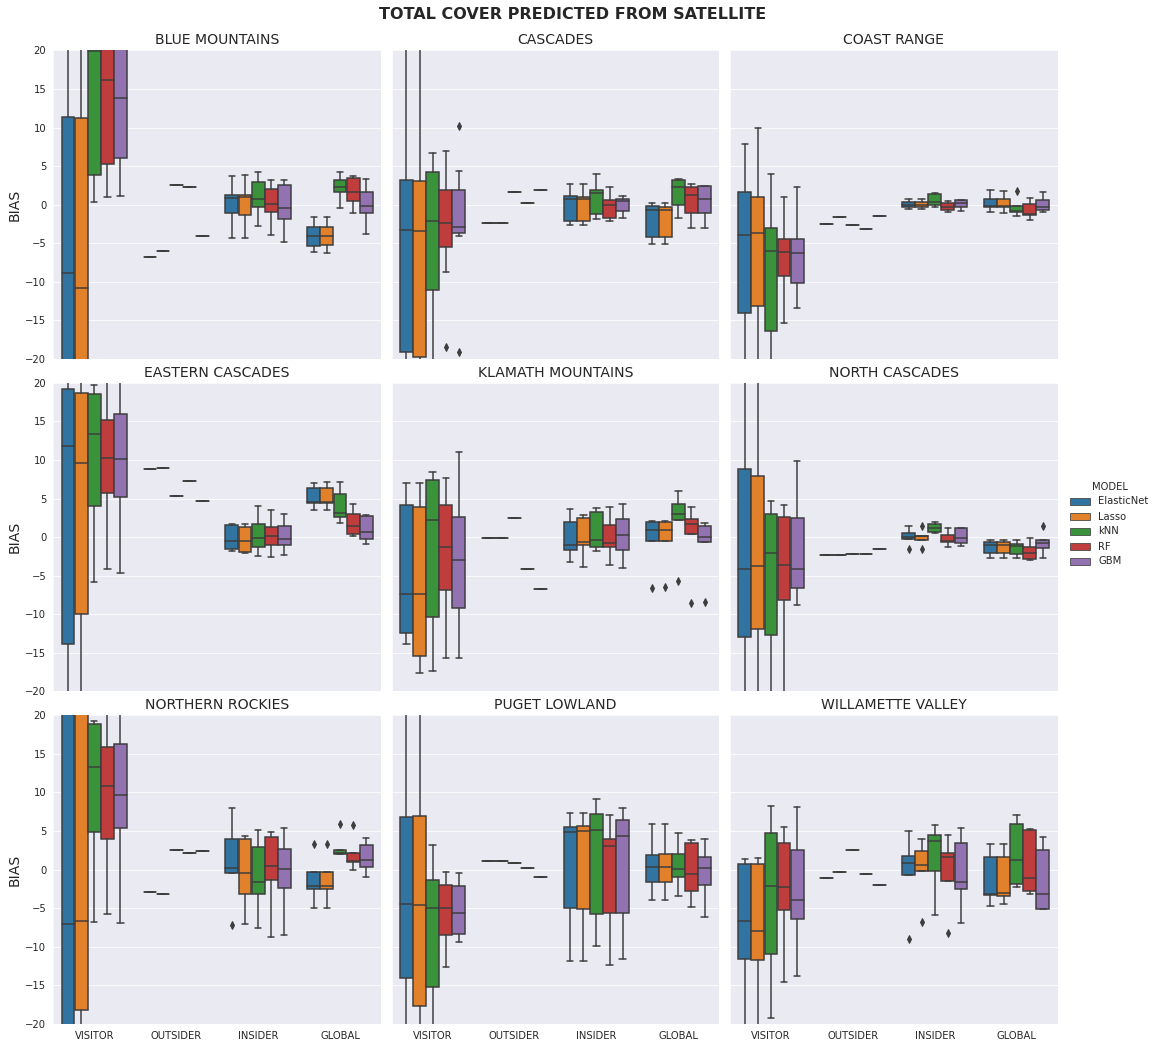

In [22]:
TARGET = 'total_cover'
METRIC = 'bias'
g1, g2 = make_plots(TARGET, METRIC, ylim=(-20,20))
g1.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_lidar.png", bbox_inches='tight', dpi=300)
g2.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_satellite.png", bbox_inches='tight', dpi=300)

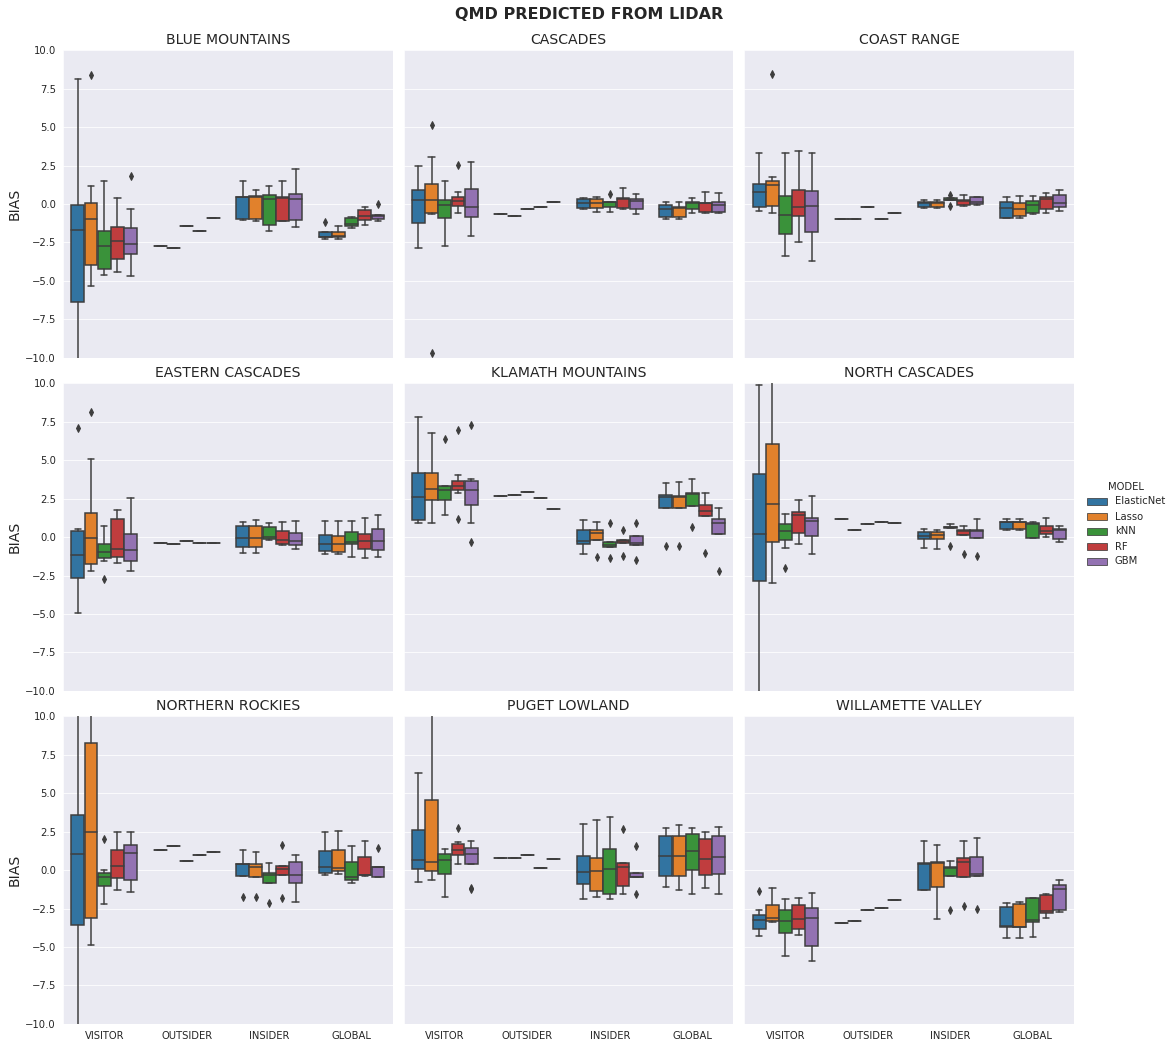

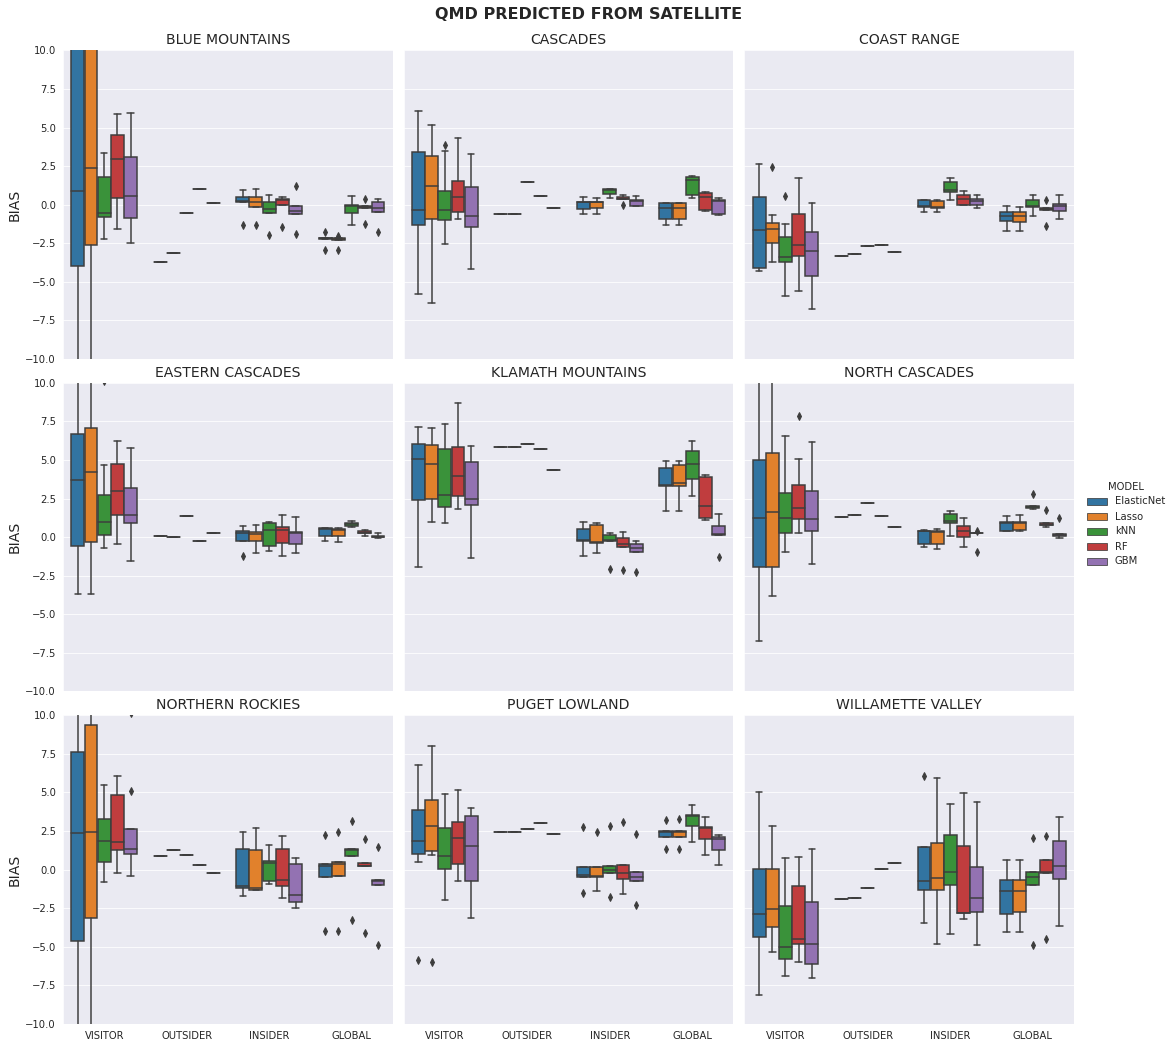

In [23]:
TARGET = 'qmd'
METRIC = 'bias'
g1, g2 = make_plots(TARGET, METRIC, ylim=(-10,10))
g1.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_lidar.png", bbox_inches='tight', dpi=300)
g2.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_satellite.png", bbox_inches='tight', dpi=300)

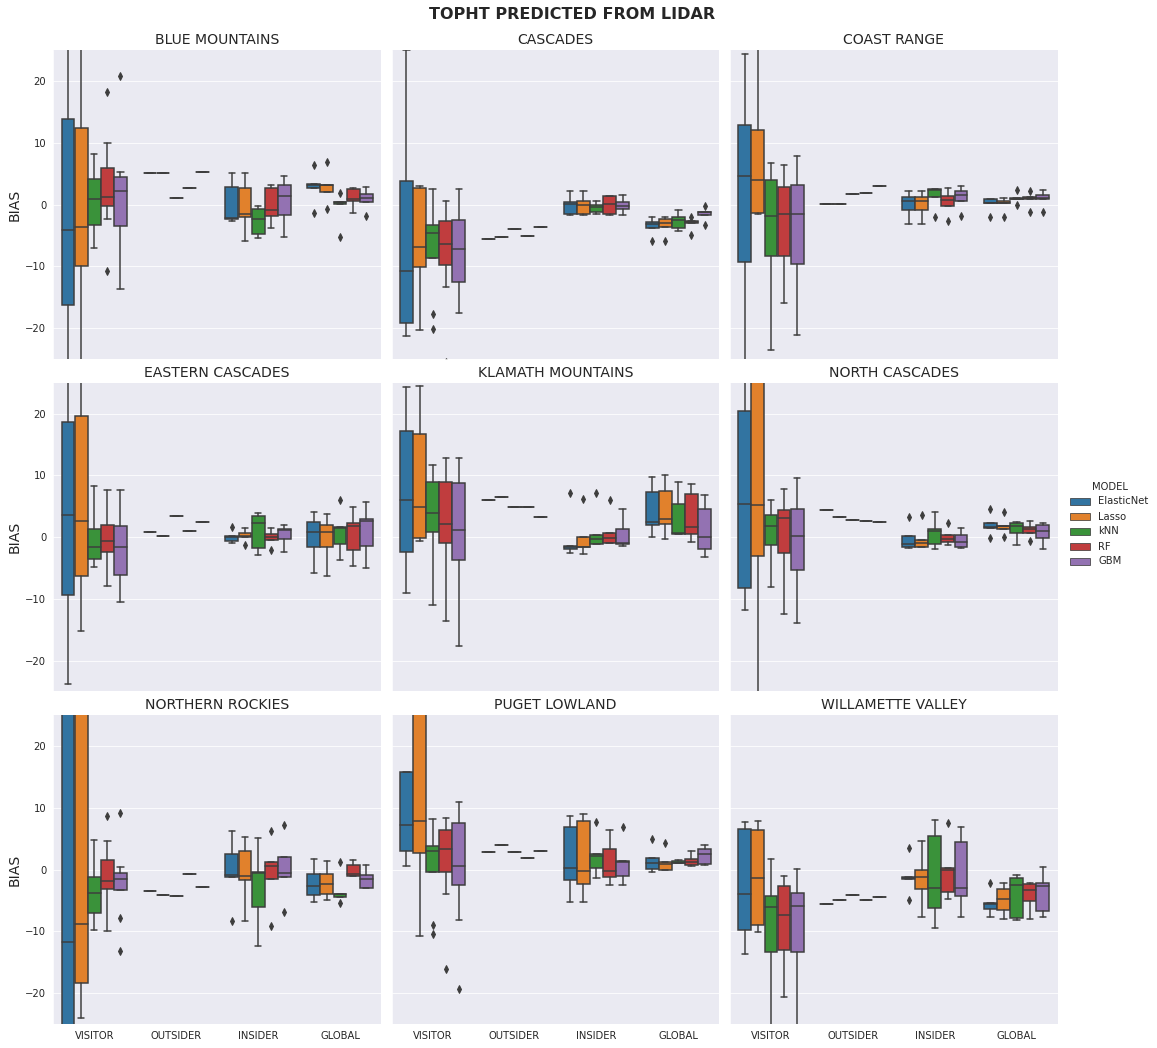

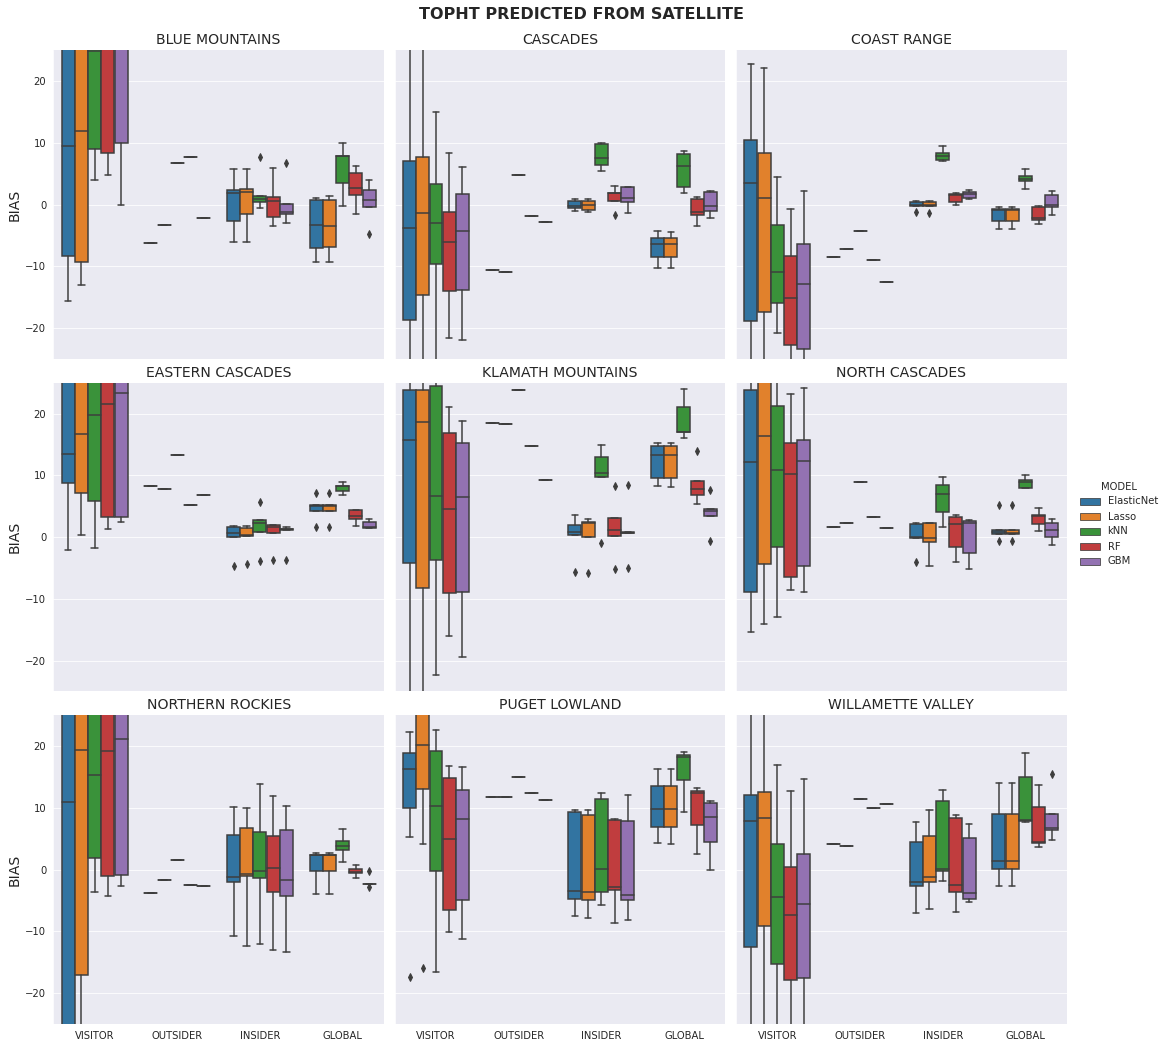

In [24]:
TARGET = 'topht'
METRIC = 'bias'
g1, g2 = make_plots(TARGET, METRIC, ylim=(-25,25))
g1.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_lidar.png", bbox_inches='tight', dpi=300)
g2.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_satellite.png", bbox_inches='tight', dpi=300)

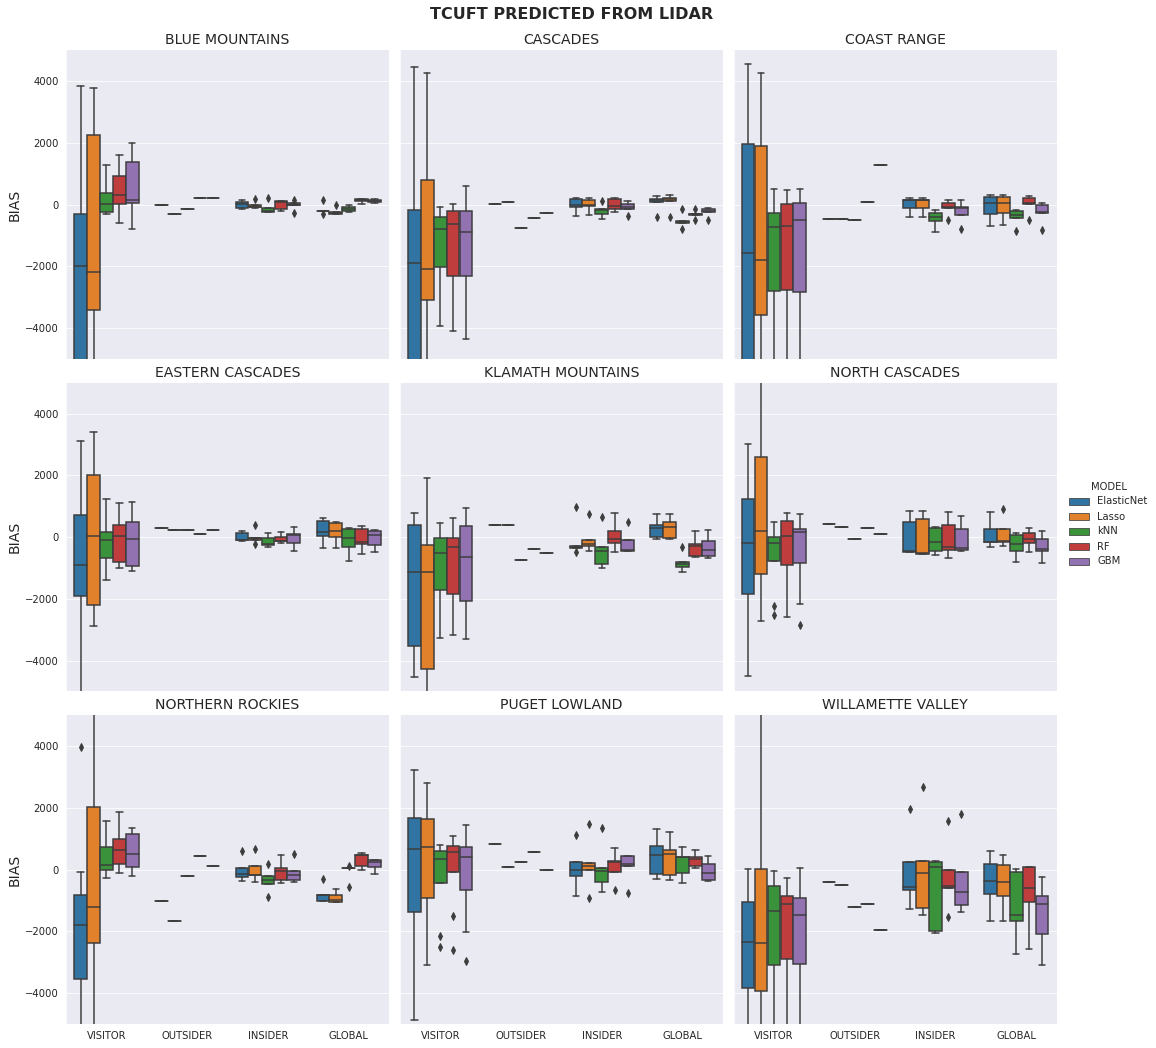

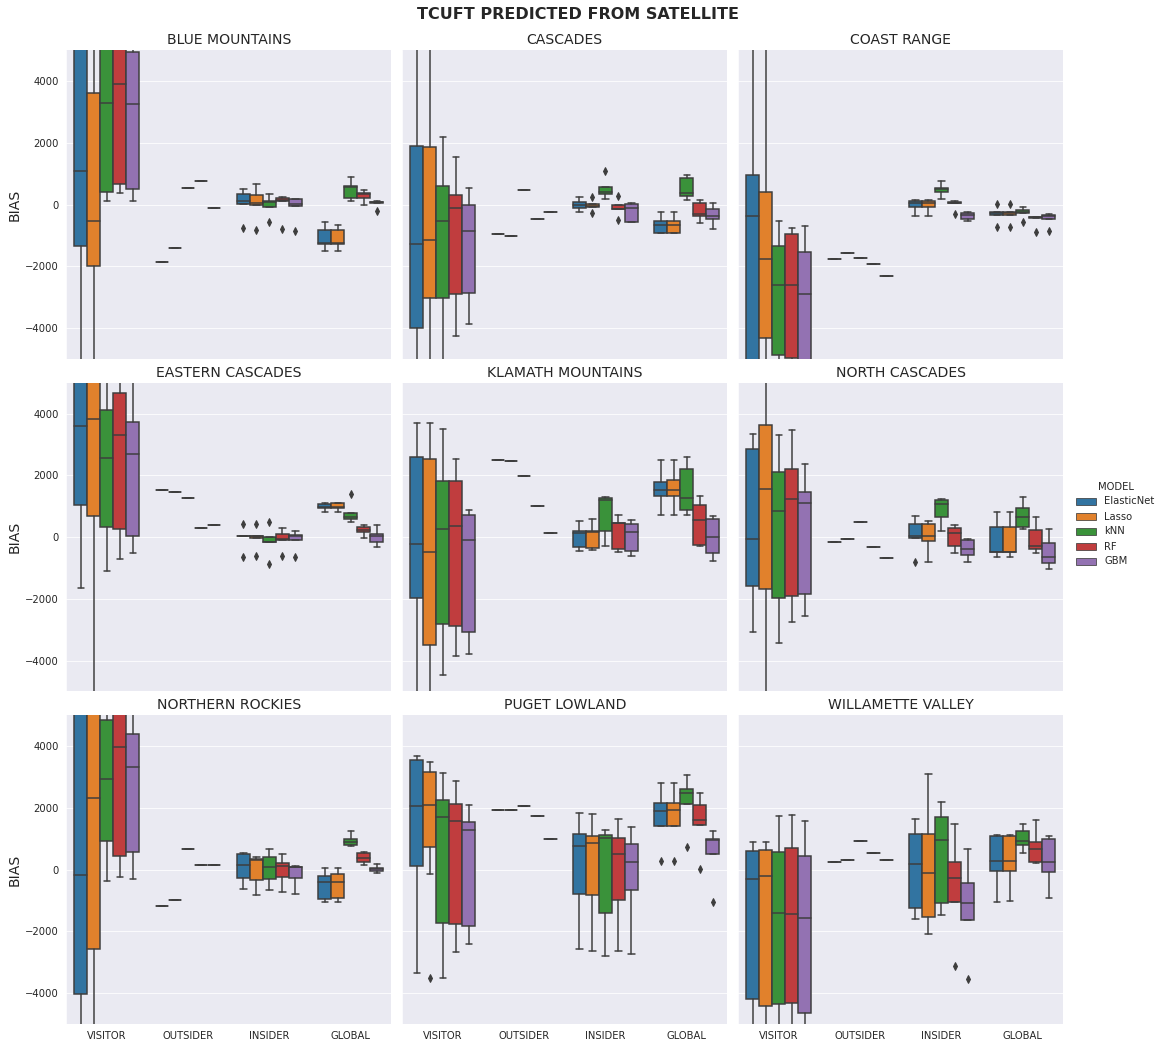

In [25]:
TARGET = 'tcuft'
METRIC = 'bias'
g1, g2 = make_plots(TARGET, METRIC, ylim=(-5000,5000))
g1.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_lidar.png", bbox_inches='tight', dpi=300)
g2.savefig(f"../reports/figures/transferability_{TARGET.replace('_', '-')}_{METRIC}_satellite.png", bbox_inches='tight', dpi=300)

In [26]:
TARGET = 'tcuft'
METRIC = 'mae'

def highlight_mins(s):
    is_large = s.nsmallest(3).values
    return ['background-color: yellow' if v in is_large else '' for v in s]

query = f'METRIC == "{METRIC}" and TARGET == "{TARGET}"'
to_group = df.query(query)
grouped = to_group.groupby(
    by=['ECOREGION_LABEL', 'SCOPE', 'DATA_SOURCE', 'MODEL']
)['SCORE'].mean()
pivoted = pd.pivot_table(
    grouped.reset_index(),
    index=['ECOREGION_LABEL', 'DATA_SOURCE'],
    columns=['SCOPE', 'MODEL'],
    values=['SCORE'])['SCORE']
models = ['ElasticNet', 'Lasso', 'kNN', 'RF', 'GBM']
scopes = ['visitor', 'outsider', 'insider', 'global']
idx = pd.MultiIndex.from_product([scopes, models], names=['SCOPE', 'MODEL'])
(pivoted[idx]
 .style
 .format("{:.2f}")
 .apply(highlight_mins, axis=1)
 .highlight_min(color='red', axis=1)
)

In [27]:
TARGET = 'tcuft'
METRIC = 'bias'

def highlight_abs_mins(s):
    is_large = abs(s).nsmallest(3).values
    return ['background-color: yellow' if abs(v) in is_large else '' for v in s]
def highlight_abs_min(s):
    is_large = abs(s).nsmallest(1).values
    return ['background-color: red' if abs(v) in is_large else '' for v in s]

query = f'METRIC == "{METRIC}" and TARGET == "{TARGET}"'
to_group = df.query(query)
grouped = to_group.groupby(
    by=['ECOREGION_LABEL', 'SCOPE', 'DATA_SOURCE', 'MODEL']
)['SCORE'].mean()
pivoted = pd.pivot_table(
    grouped.reset_index(),
    index=['ECOREGION_LABEL', 'DATA_SOURCE'],
    columns=['SCOPE', 'MODEL'],
    values=['SCORE'])['SCORE']
models = ['ElasticNet', 'Lasso', 'kNN', 'RF', 'GBM']
scopes = ['visitor', 'outsider', 'insider', 'global']
idx = pd.MultiIndex.from_product([scopes, models], names=['SCOPE', 'MODEL'])
(pivoted[idx]
 .style
 .format("{:.2f}")
 .apply(highlight_abs_mins, axis=1)
 .apply(highlight_abs_min, axis=1)
)

In [28]:
TARGET = 'tcuft'
to_group = df.loc[(df.TARGET == TARGET)&(df.SCOPE.isin(['global', 'insider']))]
grouped = to_group.groupby(
    by=['SCOPE', 'ECOREGION_LABEL', 'DATA_SOURCE', 'MODEL', 'METRIC']
)['SCORE'].mean()
pivoted = pd.pivot_table(
    grouped.reset_index(),
    index=['SCOPE', 'ECOREGION_LABEL', 'DATA_SOURCE'],
    columns=['METRIC', 'MODEL'],
    values=['SCORE'])['SCORE']
metrics = ['nrmse', 'mape', 'rel_bias']
models = ['ElasticNet', 'Lasso', 'kNN', 'RF', 'GBM']
idx = pd.MultiIndex.from_product([metrics, models], names=['METRIC', 'MODEL'])
glob = pivoted[idx].loc['global']
ins = pivoted[idx].loc['insider']
diff = abs(glob) - abs(ins)
(diff
 .style
 .format("{:+.1%}")
 .background_gradient(axis=None, cmap='seismic_r', vmin=-.15, vmax=0.15)
)

In [29]:
TARGET = 'tcuft'
to_group = df.loc[(df.TARGET == TARGET)&(df.SCOPE.isin(['global', 'insider']))]
grouped = to_group.groupby(
    by=['SCOPE', 'ECOREGION_LABEL', 'DATA_SOURCE', 'MODEL', 'METRIC']
)['SCORE'].mean()
pivoted = pd.pivot_table(
    grouped.reset_index(),
    index=['SCOPE', 'ECOREGION_LABEL', 'DATA_SOURCE'],
    columns=['METRIC', 'MODEL'],
    values=['SCORE'])['SCORE']
metrics = ['rmse', 'mae', 'bias']
models = ['ElasticNet', 'Lasso', 'kNN', 'RF', 'GBM']
idx = pd.MultiIndex.from_product([metrics, models], names=['METRIC', 'MODEL'])
glob = pivoted[idx].loc['global']
ins = pivoted[idx].loc['insider']
diff = abs(glob) - abs(ins)
(diff
 .style
 .format("{:+.1f}")
 .background_gradient(axis=None, cmap='seismic_r', vmin=-5.0, vmax=5.0)
)

In [30]:
TARGET = 'tcuft'
to_group = df.loc[(df.TARGET == TARGET)&(df.SCOPE.isin(['global']))]
grouped = to_group.groupby(
    by=['DATA_SOURCE', 'ECOREGION_LABEL', 'MODEL', 'METRIC']
)['SCORE'].mean()
pivoted = pd.pivot_table(
    grouped.reset_index(),
    index=['DATA_SOURCE', 'ECOREGION_LABEL'],
    columns=['METRIC', 'MODEL'],
    values=['SCORE'])['SCORE']
metrics = ['rmse', 'mae', 'bias']
models = ['ElasticNet', 'Lasso', 'kNN', 'RF', 'GBM']
idx = pd.MultiIndex.from_product([metrics, models], names=['METRIC', 'MODEL'])
sat = pivoted[idx].loc['satellite']
lid = pivoted[idx].loc['lidar']
diff = abs(sat) - abs(lid)
(diff
 .style
 .format("{:+.1f}")
 .background_gradient(axis=None, cmap='seismic_r', vmin=-5.0, vmax=5.0)
)

In [31]:
TARGET = 'tcuft'
to_group = df.loc[(df.TARGET == TARGET)&(df.SCOPE.isin(['global']))]
grouped = to_group.groupby(
    by=['DATA_SOURCE', 'ECOREGION_LABEL', 'MODEL', 'METRIC']
)['SCORE'].mean()
pivoted = pd.pivot_table(
    grouped.reset_index(),
    index=['DATA_SOURCE', 'ECOREGION_LABEL'],
    columns=['METRIC', 'MODEL'],
    values=['SCORE'])['SCORE']
metrics = ['nrmse', 'mape', 'rel_bias']
models = ['ElasticNet', 'Lasso', 'kNN', 'RF', 'GBM']
idx = pd.MultiIndex.from_product([metrics, models], names=['METRIC', 'MODEL'])
sat = pivoted[idx].loc['satellite']
lid = pivoted[idx].loc['lidar']
diff = abs(sat) - abs(lid)
(diff
 .style
 .format("{:+.1%}")
 .background_gradient(axis=None, cmap='seismic_r', vmin=-0.15, vmax=0.15)
)